# P6 : Analyse des ventes d'une librairie 

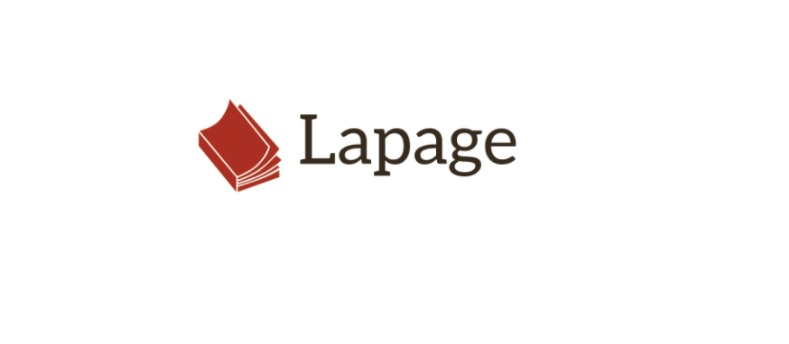

## Sommaire:

### Etape préliminaire : 

* Analyse et nettoyage des DataFrames

### Partie 1: ###

 * Evolution du CA dans le temps (indicateurs et graphiques)
 * Top et flop des références par catégories
 * Déterminer le profil client
 * Répartition du CA par client avec courbe de Lorenz
 
### Partie 2 : ###

 * Etablir le lien entre le genre d'un client et la categorie de produit achetée (chi-2)
 * Lien entre l'âge du client et le montant total de ses achats , fréquence d'achat, taille du panier moyen et catégorie de livres
 * Calculer la proba qu'un client achète la réference 0_525 sachant qu'il à acheté la réference 2_159

### Etape préliminaire : Analyse et nettoyage des DataFrames

Import des librairies nécessaires : 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

Lecture des fichiers CSV : 

In [2]:
customers = pd.read_csv(r'C:\Users\NK\P6\customers.csv')
products = pd.read_csv(r'C:\Users\NK\P6\products.csv')
transactions = pd.read_csv(r'C:\Users\NK\P6\transactions.csv')

Check des Datarames :

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Création des copies des DataFrames : 

In [9]:
df_transactions = transactions
df_customers = customers
df_products = products

**Analyse des DataFrames :**

* Recherche de valeurs nulles dans les clés:

In [10]:
def count_null(df):
    columns = df.columns
    list_null = df.isnull().sum().values
    df_null = pd.DataFrame()
    df_null['columns']=columns
    df_null['nb_null']=list_null
    df_null['%_null']=(df_null['nb_null']*100)/len(df)
    return df_null  

In [11]:
count_null(df_customers)

,columns,nb_null,%_null
0,client_id,0,0.0
1,sex,0,0.0
2,birth,0,0.0


In [12]:
count_null(df_products)

,columns,nb_null,%_null
0,id_prod,0,0.0
1,price,0,0.0
2,categ,0,0.0


In [13]:
count_null(df_transactions)

,columns,nb_null,%_null
0,id_prod,0,0.0
1,date,0,0.0
2,session_id,0,0.0
3,client_id,0,0.0


* Recherche de doublons :

In [14]:
def count_doublon(df):
    print('Taille du DataFrame =',len(df))
    count_doublon = len(df)-len(df.drop_duplicates())
    if count_doublon>0:
        percent_doublon = (count_doublon*100)/len(df)
        df_doublon = df[df.duplicated(keep="first")]
        print('Nombre de doublons dans le DataFrame =',count_doublon)
        print('Pourcentage de doublons dans le DataFrame =',percent_doublon,'%')
        print('Liste des doublons :')
        return df_doublon
    else :
        print('Pas de doublons.')

In [15]:
def  doublon_recurrent(df):
    df_doublon= df[df.duplicated(keep="first")]
    df_doublon_rec=df_doublon.drop_duplicates()
    print('Taille du DataFrame de doublons récurrents:',len(df_doublon_rec))
    return df_doublon_rec.head(10)

In [16]:
count_doublon(df_customers['client_id'])

Taille du DataFrame = 8623
Pas de doublons.


In [17]:
count_doublon(products['id_prod'])

Taille du DataFrame = 3287
Pas de doublons.


In [18]:
count_doublon(df_transactions)

Taille du DataFrame = 679532
Nombre de doublons dans le DataFrame = 126
Pourcentage de doublons dans le DataFrame = 0.018542173142692322 %
Liste des doublons :


,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [19]:
doublon_recurrent(df_transactions)

Taille du DataFrame de doublons récurrents: 57


,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
148481,T_0,test_2021-03-01 02:30:02.237426,s_0,ct_0
155233,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
156802,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
165314,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
167020,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_0
167869,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_1


In [20]:
doublon_transactions = df_transactions[df_transactions.duplicated()]

In [21]:
doublon_transactions.groupby(['id_prod']).count()

,date,session_id,client_id
id_prod,,,
T_0,126,126,126


**Les 126 doublons de df_transactions sont liés au produit T_0 qui semble être une transaction test**

In [22]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


* Recherche de colonnes vierges :

In [23]:
def columns_null(df):
    columns = df.columns
    df_copy = df
    df_copy['null'] = np.nan
    df_copy['zero'] =0
    liste_supp =[]
    liste_cons =[]
    for i in range (len(columns)):
        if (df[columns[i]].equals(df_copy['null'])) or (df[columns[i]].equals(df_copy['zero'])):
            liste_supp.append(columns[i])
        else:
            liste_cons.append(columns[i])
    del df['null']
    del df['zero']
    if (len(liste_supp)==0) :
        print('Aucune colonne vierge sur le DataFrame')
    else:
        print('Liste des colonnes à supprimer :',liste_supp)
        print('Liste des colonnes  à conserver :',liste_cons)

In [24]:
columns_null(df_customers)

Aucune colonne vierge sur le DataFrame


In [25]:
columns_null(df_transactions)

Aucune colonne vierge sur le DataFrame


In [26]:
columns_null(products)

Aucune colonne vierge sur le DataFrame


In [27]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


**Nettoyage de la DF transactions :** 

On supprime les doublons :

In [28]:
df_transactions = df_transactions.drop_duplicates(keep='first')

On se sépare du produit de reférence 'T_0':

In [29]:
df_transactions = df_transactions[df_transactions['id_prod']!='T_0']

In [30]:
print('Nouvelle taille de la df_transactions = ',len(df_transactions))

Nouvelle taille de la df_transactions =  679332


Vérifications de la présence de doublons après nettoyage:

In [31]:
count_doublon(df_transactions)

Taille du DataFrame = 679332
Pas de doublons.


**Préparation de la colonne "date" :**

In [32]:
df_transactions["Date"],df_transactions["None"] = df_transactions["date"].str.split(' ',1).str

<ipython-input-32-3fccfa00fa27>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_transactions["Date"],df_transactions["None"] = df_transactions["date"].str.split(' ',1).str


In [33]:
del df_transactions["date"]
del df_transactions["None"]

In [34]:
df_transactions["Date"] = df_transactions["Date"].str.replace('-','/')

On convertit la colonne 'date' au format Datetime :

In [35]:
df_transactions

,id_prod,session_id,client_id,Date
0,0_1518,s_211425,c_103,2022/05/20
1,1_251,s_158752,c_8534,2022/02/02
2,0_1277,s_225667,c_6714,2022/06/18
3,2_209,s_52962,c_6941,2021/06/24
4,0_1509,s_325227,c_4232,2023/01/11
...,...,...,...,...
679527,0_1551,s_150195,c_8489,2022/01/15
679528,1_639,s_181434,c_4370,2022/03/19
679529,0_1425,s_314704,c_304,2022/12/20
679530,0_1994,s_63204,c_2227,2021/07/16


In [36]:
df_transactions['Date'] = pd.to_datetime(df_transactions['Date'],format="%Y/%m/%d")

**Vérifications de l'evolution du nombre de transactions dans le temps :** 

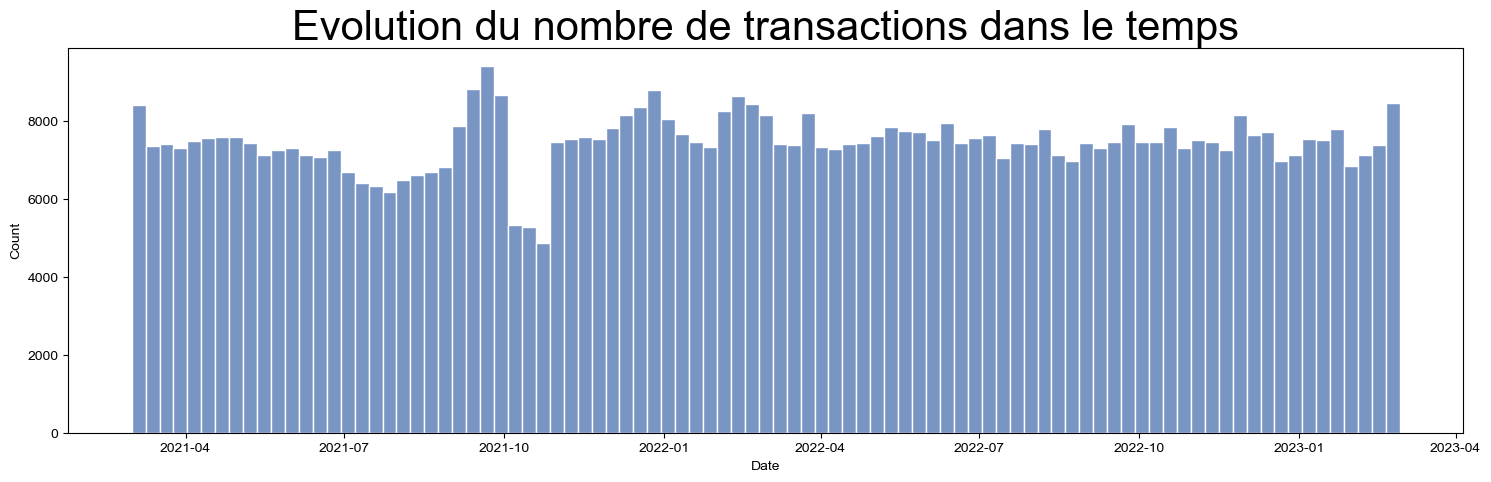

In [37]:
fig, ax = plt.subplots(figsize=(18,5))

sns.set_theme(style="darkgrid")

sns.histplot(data=df_transactions, x='Date')

plt.title('Evolution du nombre de transactions dans le temps',size=30)

plt.show()

In [38]:
# vérifier les données manquantes et donner une théorie

**On constate une forte perturbation du nombre de transactions dans la période du 10-2021, il se peut qu'il y ai eu une perturbation dans la récolte des données dans cette période**

In [39]:
df_oct_2021 = df_transactions[df_transactions['Date']>'2021/10/01']
df_oct_2021 = df_oct_2021[df_oct_2021['Date']<'2021/10/30']

In [40]:
df_oct_2022 = df_transactions[df_transactions['Date']>'2022-10-01']
df_oct_2022 = df_oct_2022[df_oct_2022['Date']<'2022-10-30']

In [41]:
df_oct_2021 = df_oct_2021.merge(df_products, on='id_prod', how='inner')
df_oct_2022 = df_oct_2022.merge(df_products, on='id_prod', how='inner')

In [42]:
df_oct_2021['cat_0'] = df_oct_2021['categ']==0
df_oct_2021['cat_1'] = df_oct_2021['categ']==1
df_oct_2021['cat_2'] = df_oct_2021['categ']==2
df_oct_2022['cat_0'] = df_oct_2021['categ']==0
df_oct_2022['cat_1'] = df_oct_2021['categ']==1
df_oct_2022['cat_2'] = df_oct_2021['categ']==2

In [43]:
df_oct_2021.groupby(['Date']).agg({'id_prod':'count','price':'sum','cat_0':'sum','cat_1':'sum','cat_2':'sum'}).head(10)

,id_prod,price,cat_0,cat_1,cat_2
Date,,,,,
2021-10-02,689,9182.13,661,0,28
2021-10-03,679,8993.05,648,0,31
2021-10-04,639,9279.68,601,0,38
2021-10-05,632,9390.46,594,0,38
2021-10-06,728,9490.69,702,0,26
2021-10-07,623,8191.08,597,0,26
2021-10-08,713,10207.35,669,0,44
2021-10-09,675,9425.36,640,0,35
2021-10-10,629,8825.65,600,0,29


In [44]:
df_oct_2022.groupby(['Date']).agg({'id_prod':'count','price':'sum','cat_0':'sum','cat_1':'sum','cat_2':'sum'})

,id_prod,price,cat_0,cat_1,cat_2
Date,,,,,
2022-10-02,953,16494.07,621,26,30
2022-10-03,953,15951.25,590,25,49
2022-10-04,855,14586.31,557,16,36
2022-10-05,810,15129.35,526,20,42
2022-10-06,984,16098.87,632,29,41
2022-10-07,941,18217.02,602,24,34
2022-10-08,920,15151.40,592,23,44
2022-10-09,893,15451.55,570,25,31
2022-10-10,895,15843.70,581,19,45


**Interprétation :**
* **On constate clairement la différence du nombre de vente dans la catéogire 0 entre octobre 2021 et octobre 2022**

**Hypothèse :**
* **Un problème technique à empêcher la transmission des données de transactions pour cette catégorie durant cette période**
* **Une rupture de stock pour cette catégorie expliquerait l'absence de vente durant cette période**

**Préparation du DataFrame final que l'on va exploiter :**

Merge des 2 DF : 

In [45]:
df_transactions_merge = df_transactions.merge(df_products, how='outer', on ="id_prod",indicator= True)

In [46]:
df_transactions_merge

,id_prod,session_id,client_id,Date,price,categ,_merge
0,0_1518,s_211425,c_103,2022-05-20,4.18,0.0,both
1,0_1518,s_95811,c_6197,2021-09-26,4.18,0.0,both
2,0_1518,s_30782,c_682,2021-05-06,4.18,0.0,both
3,0_1518,s_180057,c_5932,2022-03-16,4.18,0.0,both
4,0_1518,s_296584,c_7217,2022-11-12,4.18,0.0,both
...,...,...,...,...,...,...,...
679349,0_1624,NaN,NaN,NaT,24.50,0.0,right_only
679350,2_86,NaN,NaN,NaT,132.36,2.0,right_only
679351,0_299,NaN,NaN,NaT,22.99,0.0,right_only
679352,0_510,NaN,NaN,NaT,23.66,0.0,right_only


On check les produits qui n'ont pas pû être joint depuis la table df_transactions :

In [47]:
df_transactions_left = df_transactions_merge[df_transactions_merge['_merge']=='left_only']

In [48]:
df_transactions_left

,id_prod,session_id,client_id,Date,price,categ,_merge
542560,0_2245,s_272266,c_4746,2022-09-23,NaN,NaN,left_only
542561,0_2245,s_242482,c_6713,2022-07-23,NaN,NaN,left_only
542562,0_2245,s_306338,c_5108,2022-12-03,NaN,NaN,left_only
542563,0_2245,s_76493,c_1391,2021-08-16,NaN,NaN,left_only
542564,0_2245,s_239078,c_7954,2022-07-16,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,s_80395,c_131,2021-08-25,NaN,NaN,left_only
542777,0_2245,s_175311,c_4167,2022-03-06,NaN,NaN,left_only
542778,0_2245,s_209381,c_4453,2022-05-16,NaN,NaN,left_only
542779,0_2245,s_163405,c_1098,2022-02-11,NaN,NaN,left_only


In [49]:
df_transactions_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 542560 to 542780
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     221 non-null    object        
 1   session_id  221 non-null    object        
 2   client_id   221 non-null    object        
 3   Date        221 non-null    datetime64[ns]
 4   price       0 non-null      float64       
 5   categ       0 non-null      float64       
 6   _merge      221 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 12.4+ KB


In [50]:
prod_no_ref = df_transactions_left.groupby(['id_prod']).count()

In [51]:
prod_no_ref

,session_id,client_id,Date,price,categ,_merge
id_prod,,,,,,
0_2245,221,221,221,0,0,221


**Il n'y a qu'un seul produit de reférence 0_2245 , vendu 221 fois qui n'a pas pu être associé la df_products. On constate que les produits dont le nom commence par 0,1,2 correspondent respectivement à la catégorie 0,1,2. On peut donc réintégrer ce produit à la catégorie 0 avec un prix moyen correspondant à cette catégorie**

On va déterminer le prix moyen des produits de la catégorie 0 :

In [52]:
df_cat0 = df_transactions_merge[df_transactions_merge['categ']==0]

In [53]:
df_cat0['price'].mean()

10.638301682947473

**Le prix moyen des produits de la catégorie 0 est de 10.64€**

In [54]:
df_transactions_merge[df_transactions_merge['id_prod']=='0_2245'].fillna(value={'price':10.64,'categ':0})

,id_prod,session_id,client_id,Date,price,categ,_merge
542560,0_2245,s_272266,c_4746,2022-09-23,10.64,0.0,left_only
542561,0_2245,s_242482,c_6713,2022-07-23,10.64,0.0,left_only
542562,0_2245,s_306338,c_5108,2022-12-03,10.64,0.0,left_only
542563,0_2245,s_76493,c_1391,2021-08-16,10.64,0.0,left_only
542564,0_2245,s_239078,c_7954,2022-07-16,10.64,0.0,left_only
...,...,...,...,...,...,...,...
542776,0_2245,s_80395,c_131,2021-08-25,10.64,0.0,left_only
542777,0_2245,s_175311,c_4167,2022-03-06,10.64,0.0,left_only
542778,0_2245,s_209381,c_4453,2022-05-16,10.64,0.0,left_only
542779,0_2245,s_163405,c_1098,2022-02-11,10.64,0.0,left_only


In [55]:
count_null(df_transactions_merge)

,columns,nb_null,%_null
0,id_prod,0,0.000000
1,session_id,22,0.003238
2,client_id,22,0.003238
3,Date,22,0.003238
4,price,221,0.032531
5,categ,221,0.032531
6,_merge,0,0.000000


**Les 221 valeurs nulles du 'price' et 'categ' correspondent au produit '0_2245', on peut donc modifier le df_transactions_merge**

In [56]:
df_transactions_merge=df_transactions_merge.fillna(value={'price':10.64,'categ':0})

On vérifie que la modification à bien été effectuée:

In [57]:
count_null(df_transactions_merge)

,columns,nb_null,%_null
0,id_prod,0,0.000000
1,session_id,22,0.003238
2,client_id,22,0.003238
3,Date,22,0.003238
4,price,0,0.000000
5,categ,0,0.000000
6,_merge,0,0.000000


On check les produits qui n'ont pas pû être joint depuis la table df_products:

In [58]:
df_transactions_right = df_transactions_merge[df_transactions_merge['_merge']=='right_only']

In [59]:
df_transactions_right

,id_prod,session_id,client_id,Date,price,categ,_merge
679332,0_1016,NaN,NaN,NaT,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaT,1.67,0.0,right_only
679334,T_0,NaN,NaN,NaT,-1.00,0.0,right_only
679335,0_1062,NaN,NaN,NaT,20.08,0.0,right_only
679336,0_1119,NaN,NaN,NaT,2.99,0.0,right_only
679337,0_1014,NaN,NaN,NaT,1.15,0.0,right_only
679338,1_0,NaN,NaN,NaT,31.82,1.0,right_only
679339,0_1318,NaN,NaN,NaT,20.92,0.0,right_only
679340,0_1800,NaN,NaN,NaT,22.05,0.0,right_only
679341,0_1645,NaN,NaN,NaT,2.99,0.0,right_only


In [60]:
len(df_transactions_right)

22

**Cette suite de produits on des index qui se suivent. Il s'agit sûrement d'une suite d'erreur.Ces données ne sont pas exploitables on va donc les supprimés**

In [61]:
 df_transactions_merge[df_transactions_merge['_merge']=='right_only']

,id_prod,session_id,client_id,Date,price,categ,_merge
679332,0_1016,NaN,NaN,NaT,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaT,1.67,0.0,right_only
679334,T_0,NaN,NaN,NaT,-1.00,0.0,right_only
679335,0_1062,NaN,NaN,NaT,20.08,0.0,right_only
679336,0_1119,NaN,NaN,NaT,2.99,0.0,right_only
679337,0_1014,NaN,NaN,NaT,1.15,0.0,right_only
679338,1_0,NaN,NaN,NaT,31.82,1.0,right_only
679339,0_1318,NaN,NaN,NaT,20.92,0.0,right_only
679340,0_1800,NaN,NaN,NaT,22.05,0.0,right_only
679341,0_1645,NaN,NaN,NaT,2.99,0.0,right_only


In [62]:
df_transactions_merge = df_transactions_merge.dropna()

In [63]:
count_null(df_transactions_merge)

,columns,nb_null,%_null
0,id_prod,0,0.0
1,session_id,0,0.0
2,client_id,0,0.0
3,Date,0,0.0
4,price,0,0.0
5,categ,0,0.0
6,_merge,0,0.0


In [64]:
del df_transactions_merge['_merge']

**On créer la colonne âge dans le df_customers :**

In [65]:
df_customers['age'] = 2021 - df_customers['birth']

In [66]:
del df_customers['birth']

**Merge avec le dernier DatFrame pour donner le DataFrame final :**

In [67]:
df_merge = df_transactions_merge.merge(df_customers, how='outer', on='client_id', indicator=True)

In [68]:
count_null(df_merge)

,columns,nb_null,%_null
0,id_prod,23,0.003386
1,session_id,23,0.003386
2,client_id,0,0.000000
3,Date,23,0.003386
4,price,23,0.003386
5,categ,23,0.003386
6,sex,0,0.000000
7,age,0,0.000000
8,_merge,0,0.000000


In [69]:
len(df_merge[df_merge['_merge']=='right_only'])

23

In [70]:
count_null(df_merge)

,columns,nb_null,%_null
0,id_prod,23,0.003386
1,session_id,23,0.003386
2,client_id,0,0.000000
3,Date,23,0.003386
4,price,23,0.003386
5,categ,23,0.003386
6,sex,0,0.000000
7,age,0,0.000000
8,_merge,0,0.000000


**Les 23 valeurs nulles correspondent aux clients n'ayant pas consommés durant cette période**

In [71]:
df_merge=df_merge[df_merge['_merge']=='both']

In [72]:
del df_merge['_merge']

## Partie 1 :

###  Objectif 1 : Analyse du CA

**Calcul du CA total :**

In [73]:
print('CA total =',round(df_merge["price"].sum()),'€')

CA total = 11856080 €


**Suite ua problème de recueil des données durant octobre 2021 nous ferons l'étude sur l'année 2022:**

In [74]:
df_final = df_merge[df_merge['Date']>'2022-01-01']
df_final = df_final[df_final['Date']<'2022-12-31']

**Calcul du CA en 2022 :** 

In [75]:
print('CA 2022 =',round(df_final["price"].sum()),'€')

CA 2022 = 6077458 €


On regroupe les ventes par semaines avec la somme des prix associés :

In [76]:
df_CA_sem = df_final.resample('W-MON', on='Date').price.sum()

In [77]:
df_CA_sem.head()

Date
2022-01-03     33780.90
2022-01-10    116836.55
2022-01-17    120730.60
2022-01-24    117368.11
2022-01-31    119569.42
Freq: W-MON, Name: price, dtype: float64

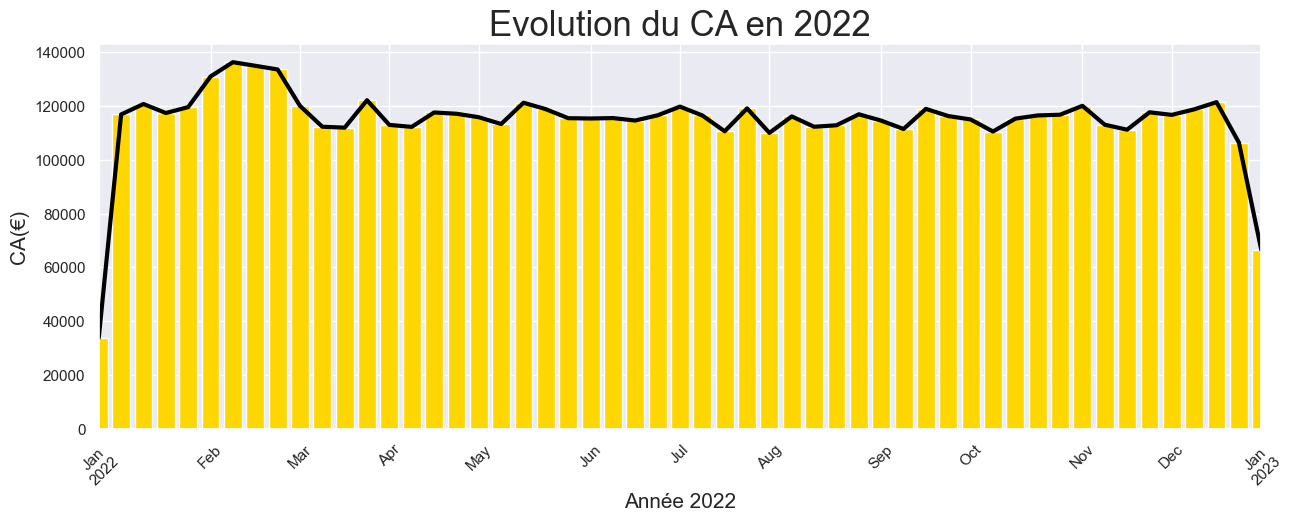

In [78]:
fig, ax = plt.subplots(figsize=(15,5))

df_CA_sem.plot(ax=ax,color='black',linewidth=3)

ax.bar(df_CA_sem.index, df_CA_sem,color='gold')

plt.xlabel('Année 2022', fontsize=15)
plt.ylabel("CA(€)", fontsize=15)
plt.title("Evolution du CA en 2022", fontsize=25)
plt.xticks(rotation= 45)

plt.show()

**On veut analyser l'évolution du CA dans le temps pour chaque catégorie de produits :**

Pour se faire, on va créer une frame par catégorie de produits:

In [79]:
df_cat0 = df_final[df_final['categ']==0]
df_cat1 = df_final[df_final['categ']==1]
df_cat2 = df_final[df_final['categ']==2]

On regroupe les vente de produits par semaines avec le CA associé :

In [80]:
df_cat0_m = df_cat0.resample('M', on='Date').price.sum()
df_cat1_m  = df_cat1.resample('M', on='Date').price.sum()
df_cat2_m = df_cat2.resample('M', on='Date').price.sum()

In [81]:
df_CA_month = pd.DataFrame(data={'cat_0':df_cat0_m,'cat_1':df_cat1_m, 'cat_2':df_cat2_m,})

In [82]:
df_CA_month.head()

,cat_0,cat_1,cat_2
Date,,,
2022-01-31,158246.07,247183.51,102856.00
2022-02-28,183314.37,213120.64,139253.53
2022-03-31,191581.98,206485.26,117506.33
2022-04-30,175146.22,195263.97,122737.71
2022-05-31,195042.58,205532.63,116727.63


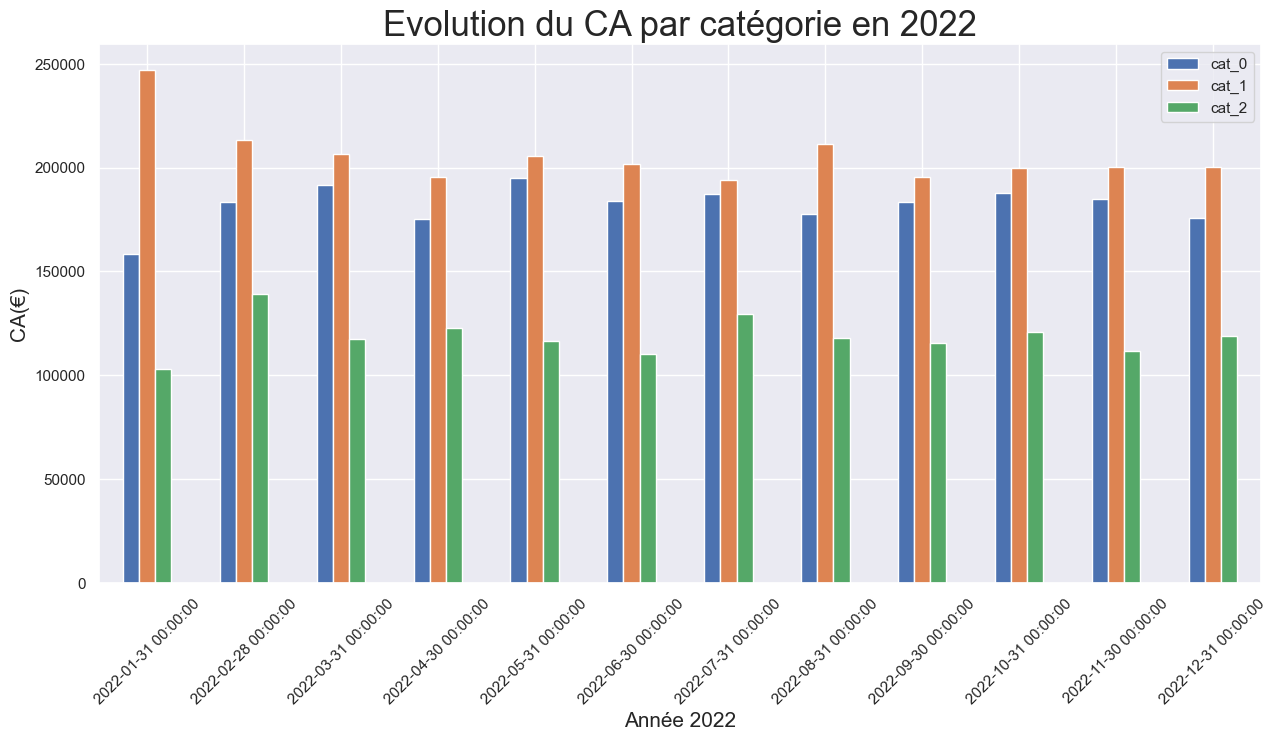

In [83]:
fig, ax = plt.subplots(figsize=(15,7))

df_CA_month.plot(kind='bar',ax=ax)

plt.xlabel('Année 2022', fontsize=15)
plt.ylabel("CA(€)", fontsize=15)
plt.title("Evolution du CA par catégorie en 2022", fontsize=25)
plt.xticks(rotation= 45)

plt.show()

**Interprétation :**
**CA_cat1 > CA_cat0 > CA_cat_2**


### Objectif 2 : Les tops et flops de références par catégories

* **Nous déterminerons les Tops de ventes par catégories de produits tout produit qui à un nombre de vente supérieur à 3 fois l'ecart-type par rapport à la moyenne (moyenne + 3 std déviation)**
* **Pour les flops nous les déterminerons à partir du nombre de vente correspondant à 1% de la moyenne des ventes . Pour les 3 catégories cela correspond à un arrondi de 1 vente au total**

On regroupe les références de produits avec leur prix associé :

In [84]:
df_cat0_ref = df_cat0.groupby(['id_prod']).agg({'price':'count'})
df_cat1_ref = df_cat1.groupby(['id_prod']).agg({'price':'count'})
df_cat2_ref = df_cat2.groupby(['id_prod']).agg({'price':'count'})

In [85]:
top_0 = df_cat0_ref[df_cat0_ref['price']>(df_cat0_ref['price'].mean()+df_cat0_ref['price'].std()*3)]
top_1 = df_cat1_ref[df_cat1_ref['price']>(df_cat1_ref['price'].mean()+df_cat1_ref['price'].std()*3)]
top_2 = df_cat2_ref[df_cat2_ref['price']>(df_cat2_ref['price'].mean()+df_cat2_ref['price'].std()*3)]

In [86]:
top_0 = top_0 .sort_values(by='price',ascending =False)
top_1 = top_1 .sort_values(by='price',ascending =False)
top_2 = top_2 .sort_values(by='price',ascending =False)

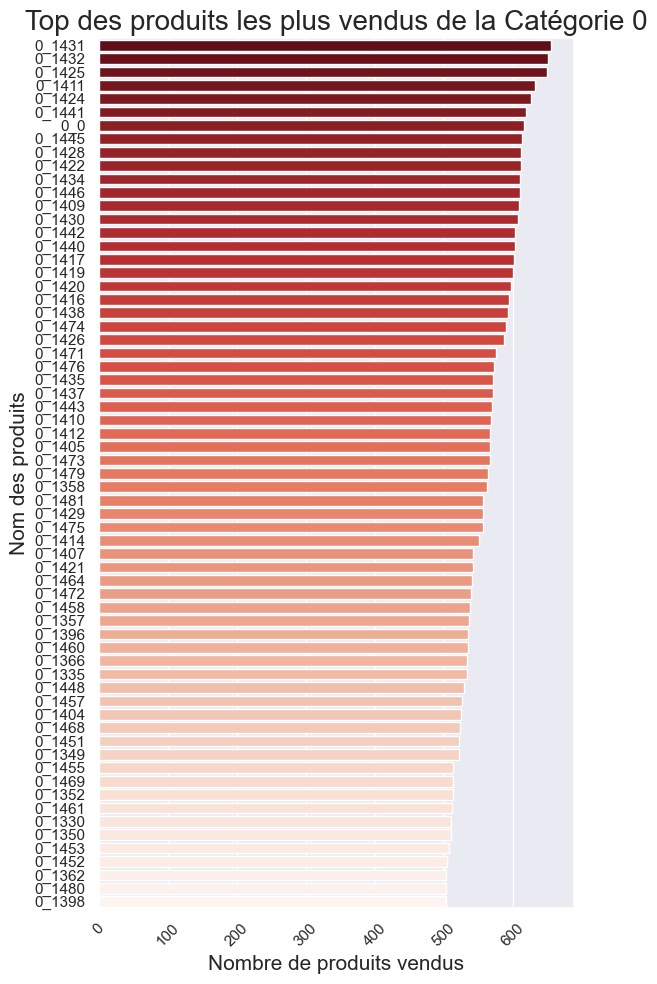

In [87]:
plt.figure(figsize=(6,10))

sns.set_theme(style = "darkgrid")

sns.barplot(x=top_0['price'], 
            y=top_0.index, palette="Reds_r")
plt.xlabel('Nombre de produits vendus', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Top des produits les plus vendus de la Catégorie 0", fontsize=20)
plt.xticks(rotation= 45)

plt.tight_layout()


plt.show()

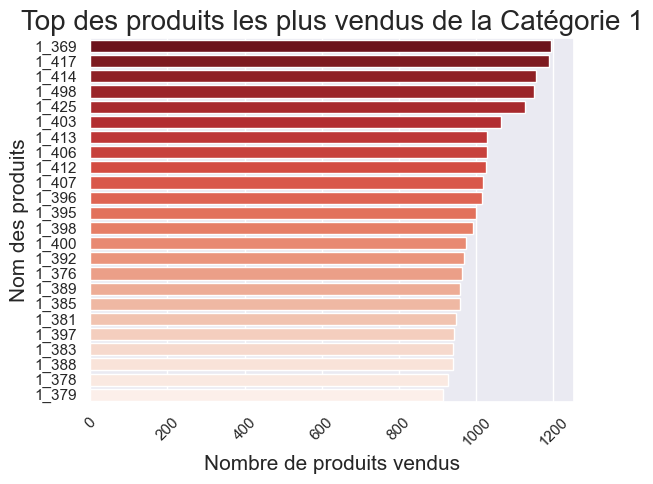

In [88]:
plt.figure(figsize=(6,5))

sns.set_theme(style = "darkgrid")

sns.barplot(x=top_1['price'], 
            y=top_1.index, palette="Reds_r")
plt.xlabel('Nombre de produits vendus', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Top des produits les plus vendus de la Catégorie 1", fontsize=20)
plt.xticks(rotation= 45)

plt.tight_layout()


plt.show()

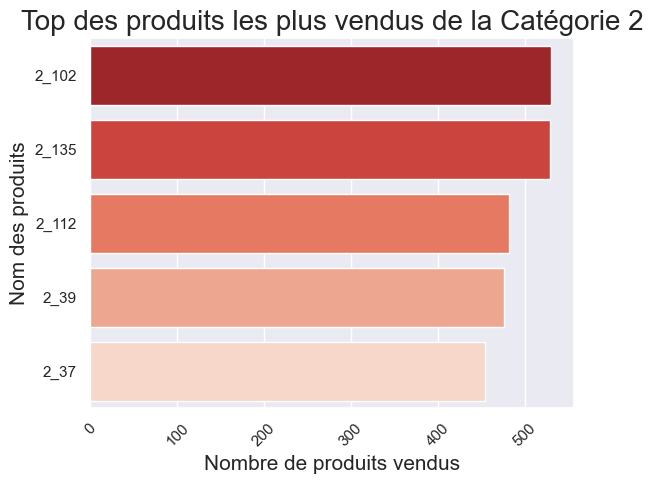

In [89]:
plt.figure(figsize=(6,5))

sns.set_theme(style = "darkgrid")

sns.barplot(x=top_2['price'], 
            y=top_2.index, palette="Reds_r")
plt.xlabel('Nombre de produits vendus', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Top des produits les plus vendus de la Catégorie 2", fontsize=20)
plt.xticks(rotation= 45)

plt.tight_layout()


plt.show()

**Les flops de vente de produits par catégories (1% de la moenne des ventes):**

In [90]:
flop_0 = df_cat0_ref[df_cat0_ref['price']==1]
flop_1 = df_cat1_ref[df_cat1_ref['price']==1]
flop_2 = df_cat2_ref[df_cat2_ref['price']==1]

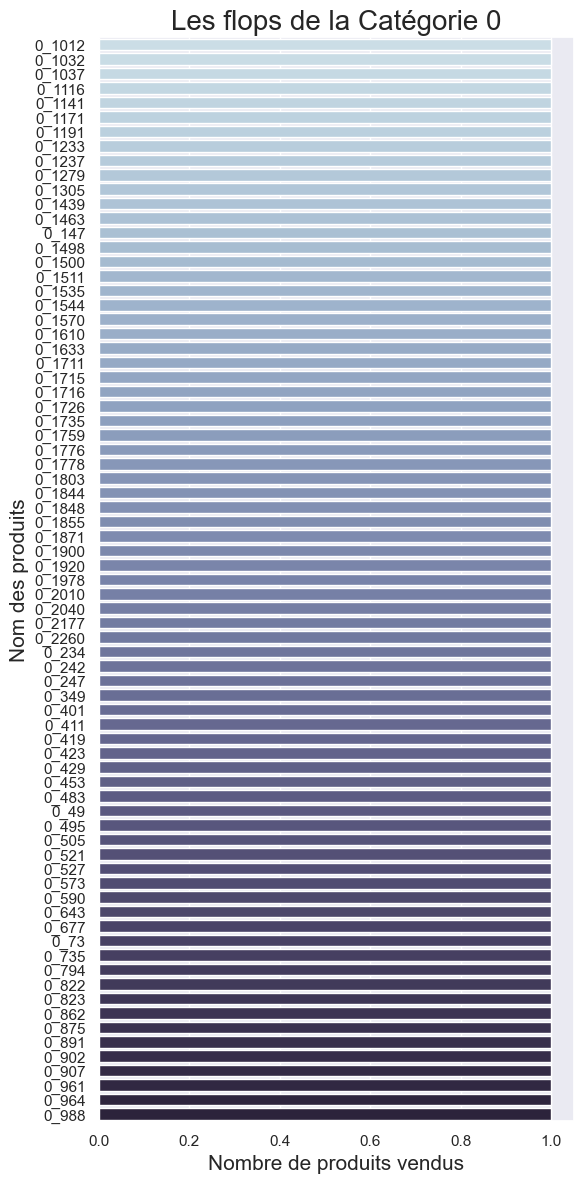

In [91]:
plt.figure(figsize=(6,12))

sns.set_theme(style = "darkgrid")

sns.barplot(x=flop_0['price'], 
            y=flop_0.index, palette="ch:s=.25,rot=-.25")
plt.xlabel('Nombre de produits vendus', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Les flops de la Catégorie 0", fontsize=20)

plt.tight_layout()


plt.show()

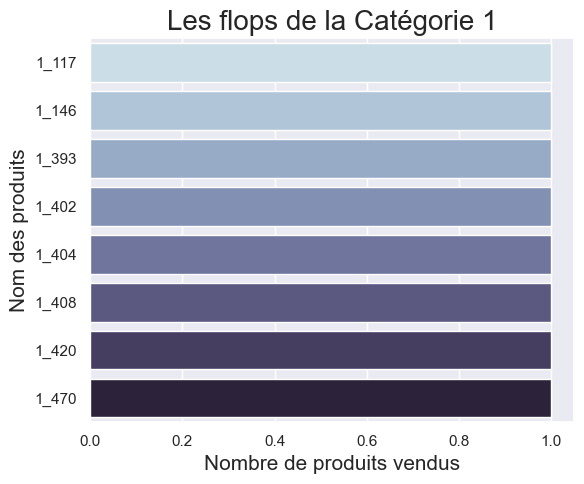

In [92]:
plt.figure(figsize=(6,5))

sns.set_theme(style = "darkgrid")

sns.barplot(x=flop_1['price'], 
            y=flop_1.index, palette="ch:s=.25,rot=-.25")
plt.xlabel('Nombre de produits vendus', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Les flops de la Catégorie 1", fontsize=20)

plt.tight_layout()


plt.show()

In [93]:
len(flop_2)

3

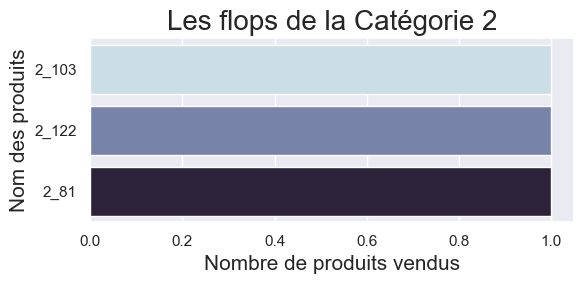

In [94]:
plt.figure(figsize=(6,3))

sns.set_theme(style = "darkgrid")

sns.barplot(x=flop_2['price'], 
            y=flop_2.index, palette="ch:s=.25,rot=-.25")
plt.xlabel('Nombre de produits vendus', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Les flops de la Catégorie 2", fontsize=20)

plt.tight_layout()


plt.show()

**La répartition de CA générer par catégorie de produits:**

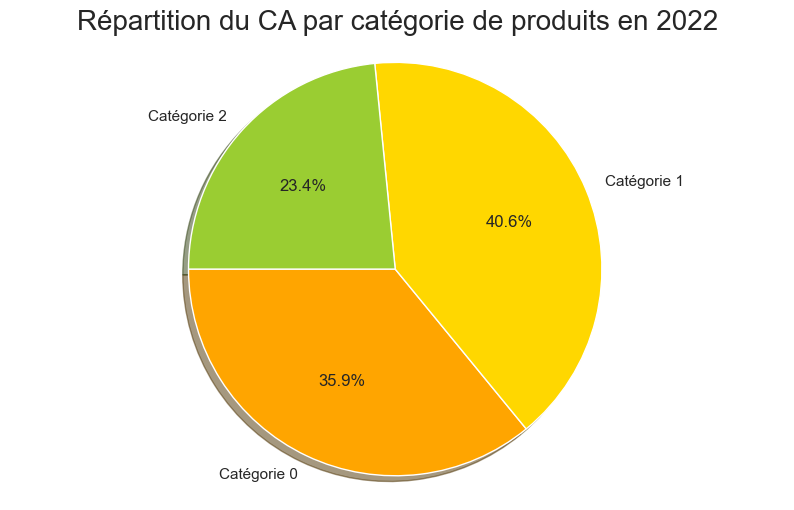

In [95]:
plt.figure(figsize=(10,6))

plt.title("Répartition du CA par catégorie de produits en 2022",size =20)

labels = 'Catégorie 0', 'Catégorie 1','Catégorie 2'
sizes = [df_cat0['price'].sum(), df_cat1['price'].sum(),df_cat2['price'].sum()]
colors = ['orange','gold','yellowgreen']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')


plt.show()

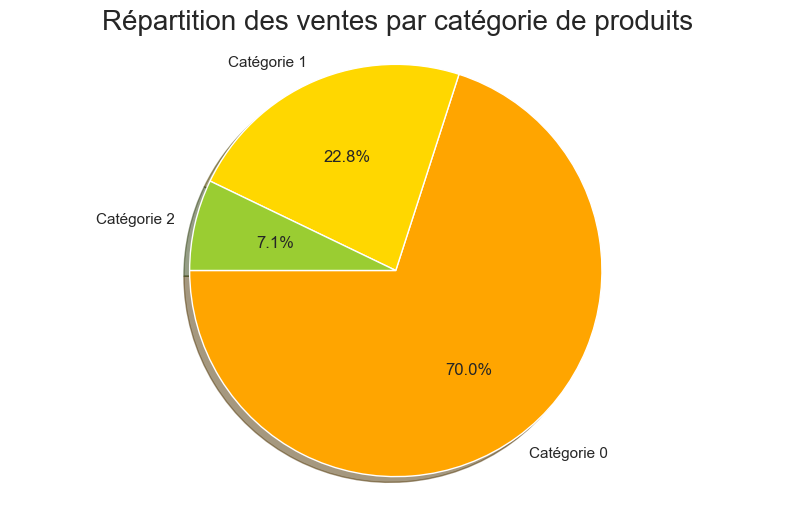

In [96]:
plt.figure(figsize=(10,6))

plt.title("Répartition des ventes par catégorie de produits",size =20)

labels = 'Catégorie 0', 'Catégorie 1','Catégorie 2'
sizes = [df_cat0_ref['price'].count(), df_cat1_ref['price'].count(),df_cat2_ref['price'].count()]
colors = ['orange','gold','yellowgreen']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')


plt.show()

In [97]:
df_products0 = df_products[df_products['categ']==0]
df_products1 = df_products[df_products['categ']==1]
df_products2 = df_products[df_products['categ']==2]

In [98]:
print('Prix moyen des produits de catégorie 0 :',df_products0['price'].mean(),'€')
print('Prix moyen des produits de catégorie 1 :',df_products1['price'].mean(),'€')
print('Prix moyen des produits de catégorie 2 :',df_products2['price'].mean(),'€')

Prix moyen des produits de catégorie 0 : 11.72728020788248 €
Prix moyen des produits de catégorie 1 : 25.531420838971624 €
Prix moyen des produits de catégorie 2 : 108.35468619246883 €


## Objectif 3 : Déterminer le profil client

### Méthode RFM :

In [99]:
from sklearn.ensemble import RandomForestClassifier

On calcul la date max d'achat de chaque client:

In [100]:
date_max_client = df_final.groupby(['client_id']).max()

On calcul le montant total des achats client:

In [101]:
total_achat_client = df_final.groupby(['client_id']).sum()

On regroupe et on utilise une aggrégation pour calculer R,F et M :

In [102]:
rfm_df = df_final.groupby(['client_id'], as_index = False).agg({'Date': 'max', 'session_id': 'count', 'price': 'sum'})
rfm_df.columns = ['client_id', 'r', 'f', 'm']

On prépare le DataFrame pour pouvoir analser les données:

In [103]:
rfm_df = rfm_df.assign(date_jour='2023-01-01')
rfm_df['date_jour'] = pd.to_datetime(rfm_df['date_jour'],format="%Y/%m/%d")
rfm_df['nb_jour']=rfm_df['date_jour']-rfm_df['r']
rfm_df['r']=rfm_df['nb_jour']

In [104]:
del rfm_df['date_jour']
del rfm_df['nb_jour']

In [105]:
rfm_df['r']=rfm_df['r'].astype('str')
rfm_df[['r','day']] = rfm_df['r'].str.split(' ',expand=True)

In [106]:
del rfm_df['day']

In [107]:
rfm_df['r']=rfm_df['r'].astype('int')

In [108]:
rfm_df['r'] = rfm_df['r'].fillna(0)
rfm_df['f'] = rfm_df['f'].fillna(0)
rfm_df['m'] = rfm_df['m'].fillna(0)

C:\Users\NK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

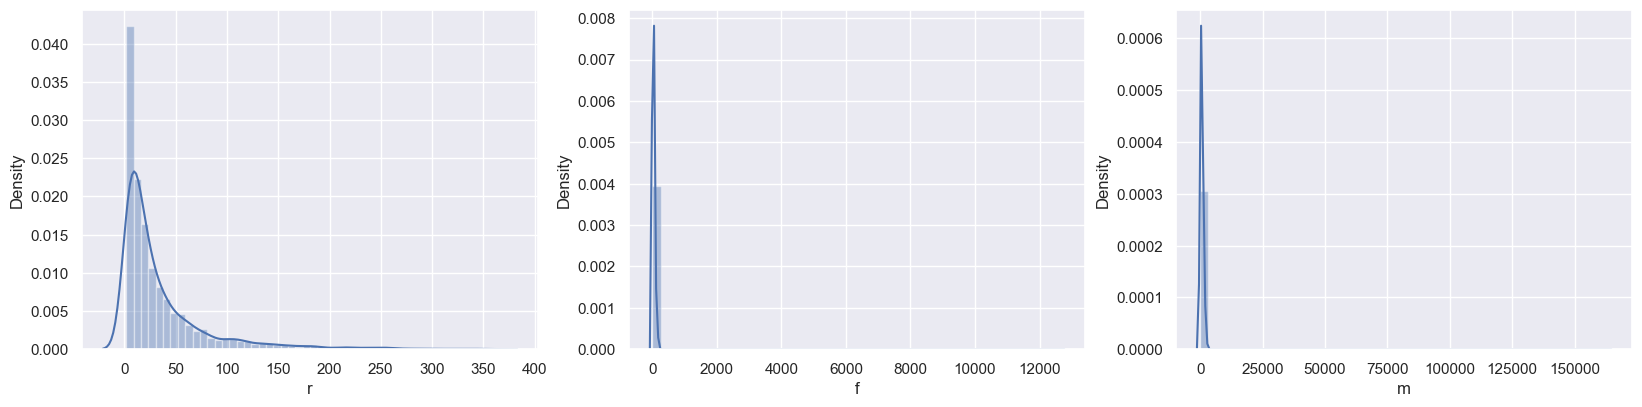

In [109]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(rfm_df['r'])
plt.subplot(3, 3, 2)
sns.distplot(rfm_df['f'])
plt.subplot(3, 3, 3)
sns.distplot(rfm_df['m'])

plt.show()

On calcule les scores à partir des quartiles:

In [110]:
# On définie les bins [<min, x, x, max]
r_bins = [rfm_df['r'].min()-1,np.quantile(rfm_df['r'],0.25), np.quantile(rfm_df['r'],0.75), rfm_df['r'].max()]
f_bins = [rfm_df['f'].min()-1,np.quantile(rfm_df['f'],0.25), np.quantile(rfm_df['f'],0.75), rfm_df['r'].max()]
m_bins = [rfm_df['m'].min()-1,np.quantile(rfm_df['m'],0.25), np.quantile(rfm_df['m'],0.75), rfm_df['m'].max()]
rfm_df['r_score'] = pd.cut(rfm_df['r'], r_bins, labels = [3, 2, 1])
rfm_df['f_score'] = pd.cut(rfm_df['f'], f_bins, labels = [1, 2, 3])
rfm_df['m_score'] = pd.cut(rfm_df['m'], m_bins, labels = [1, 2, 3])

In [111]:
rfm_df = rfm_df.merge(df_customers,on='client_id',how='inner')

In [112]:
rfm_merge = rfm_df

In [113]:
rfm_merge['sex_m'] = rfm_merge['sex']=='m'
rfm_merge['sex_f'] = rfm_merge['sex']=='f'

In [114]:
rfm_merge

,client_id,r,f,m,r_score,f_score,m_score,sex,age,sex_m,sex_f
0,c_1,6,18,219.23,3,2,1,m,66,True,False
1,c_10,4,25,602.93,3,2,2,m,65,True,False
2,c_100,103,2,31.98,1,1,1,m,29,True,False
3,c_1000,11,76,1467.14,2,3,3,f,55,False,True
4,c_1001,14,43,669.70,2,2,2,m,39,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8517,c_995,41,6,70.33,2,1,1,m,66,True,False
8518,c_996,2,51,854.92,3,3,2,f,51,False,True
8519,c_997,22,35,906.13,2,2,2,f,27,False,True
8520,c_998,86,25,1179.06,1,2,3,m,20,True,False


On créer une colonne de concaténation entre les scores RFM:

In [115]:
rfm_merge['r_score']=rfm_merge['r_score'].astype('str')
rfm_merge['f_score']=rfm_merge['f_score'].astype('str')
rfm_merge['m_score']=rfm_merge['m_score'].astype('str')

In [116]:
rfm_merge['rfm_group'] = rfm_merge['r_score'].str.cat(rfm_merge['f_score']).str.cat(rfm_merge['m_score'])

On créer un DataFrame qui donne le nombre de client pour chauqe groupe :

In [117]:
rfm_group = rfm_merge.groupby(['rfm_group']).agg({'client_id':'count','m':'sum','sex_f':'sum','sex_m':'sum','age':'mean'})

In [118]:
rfm_group

,client_id,m,sex_f,sex_m,age
rfm_group,,,,,
111,949,110989.53,496,453,43.861960
112,268,123000.42,140,128,23.638060
113,3,3499.81,2,1,20.333333
121,168,36721.30,84,84,45.089286
122,597,278119.02,317,280,40.936348
123,70,90898.45,37,33,22.357143
132,19,14424.88,13,6,40.578947
133,8,10983.44,3,5,43.375000
211,538,75162.51,278,260,47.263941


In [119]:
rfm_group['client_percent']=(rfm_group['client_id']*100)/rfm_group['client_id'].sum()
rfm_group['CA_percent']=(rfm_group['m']*100)/rfm_group['m'].sum()
rfm_group['ratio_CA_client'] = rfm_group['CA_percent']/rfm_group['client_percent']
rfm_group['sex_f_percent'] = (rfm_group['sex_f']*100)/rfm_group['client_id'].sum()
rfm_group['sex_m_percent'] = (rfm_group['sex_m']*100)/rfm_group['client_id'].sum()

In [120]:
rfm_group = rfm_group.sort_values(by='ratio_CA_client', ascending=False)

In [121]:
rfm_group

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent
rfm_group,,,,,,,,,,
3nan3,4,451367.07,1,3,42.000000,0.046937,7.426905,158.230217,0.011734,0.035203
333,839,1221143.85,429,410,44.541120,9.845107,20.093003,2.040913,5.034030,4.811077
323,182,250193.51,105,77,25.159341,2.135649,4.116746,1.927632,1.232105,0.903544
133,8,10983.44,3,5,43.375000,0.093875,0.180724,1.925165,0.035203,0.058672
233,663,906740.34,357,306,44.280543,7.779864,14.919730,1.917737,4.189157,3.590706
223,348,463106.58,171,177,24.505747,4.083548,7.620070,1.866041,2.006571,2.076977
123,70,90898.45,37,33,22.357143,0.821403,1.495666,1.820866,0.434170,0.387233
113,3,3499.81,2,1,20.333333,0.035203,0.057587,1.635847,0.023469,0.011734
213,7,7957.96,5,2,22.142857,0.082140,0.130942,1.594128,0.058672,0.023469


On verifie le groupe 3nan3 : 

In [122]:
frm_3nan3 = rfm_merge[rfm_merge['rfm_group']=='3nan3']

In [123]:
frm_3nan3

,client_id,r,f,m,r_score,f_score,m_score,sex,age,sex_m,sex_f,rfm_group
675,c_1609,2,12690,163447.19,3,nan,3,m,41,True,False,3nan3
2695,c_3454,2,3542,59712.06,3,nan,3,m,52,True,False,3nan3
4346,c_4958,2,2708,149619.23,3,nan,3,m,22,True,False,3nan3
6279,c_6714,2,4667,78588.59,3,nan,3,f,53,False,True,3nan3


Ce sont des outliers , on peut supprimer ce groupe

In [124]:
rfm_group = rfm_group[rfm_group.index!='3nan3']
rfm_df = rfm_df[rfm_df['rfm_group']!='3nan3']

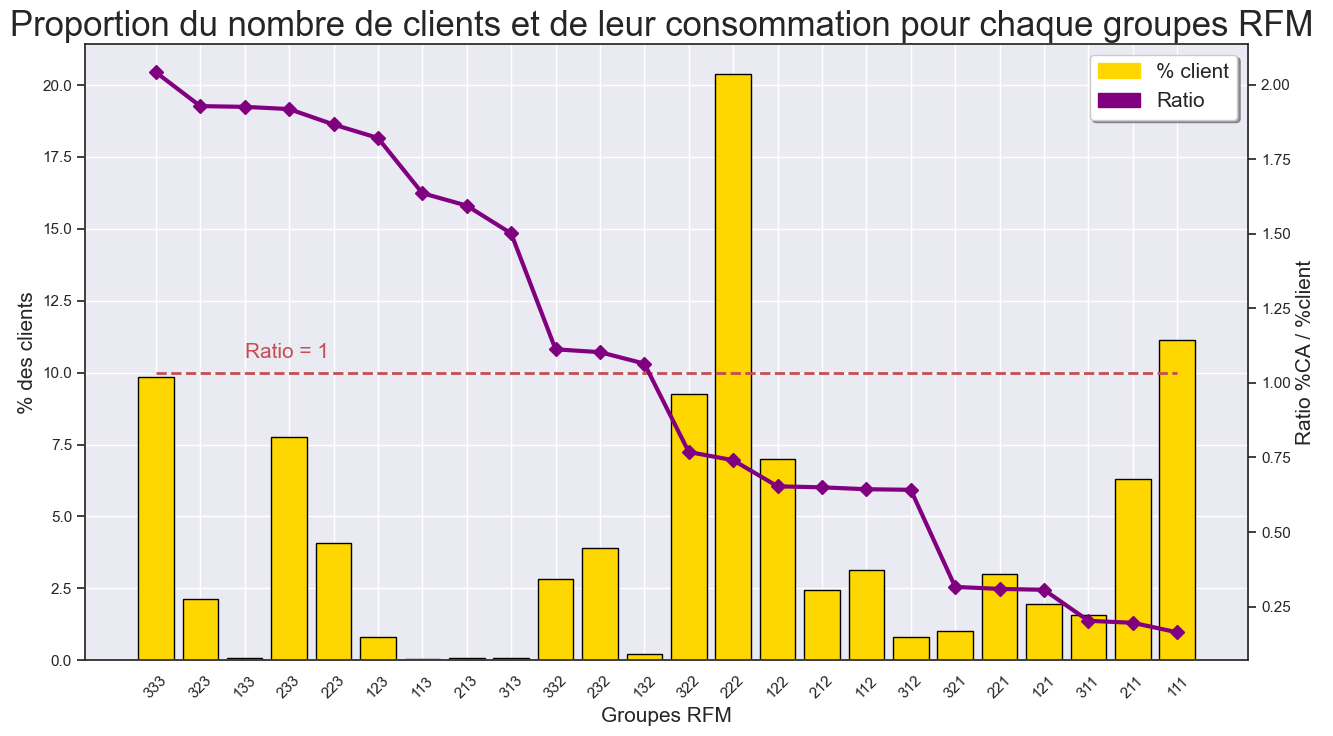

In [125]:
fig, ax = plt.subplots(figsize=(15,8))

import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

sns.set_theme(style = "white")

#rfm_group['client_percent'].plot(ax=ax,color='black',linewidth = 3)

ax.bar(rfm_group.index, rfm_group['client_percent'],color='gold',edgecolor='black',linewidth=1)
plt.ylabel("% des clients", fontsize=15)

plt.plot((['333','111']),([10,10]),'r--', lw=2)
plt.text('133',10.5, 'Ratio = 1',fontsize=15, color='r')

plt.xlabel('Groupes RFM', fontsize=15)
plt.ylabel("% des clients", fontsize=15)
plt.title("Proportion du nombre de clients et de leur consommation pour chaque groupes RFM ", fontsize=25)
plt.xticks(rfm_group.index,rotation= 45)


ax2 = ax.twinx()
ax2.plot(rfm_group.index,rfm_group['ratio_CA_client'], color="purple", linewidth = 3,marker="D", ms=7)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel('Ratio %CA / %client',size=15)

gold_patch = mpatches.Patch(color='gold', label='% client')
purple_patch = mpatches.Patch(color='purple', label='Ratio')
plt.legend(handles=[gold_patch,purple_patch],shadow=True , facecolor ='white',fontsize =15)

plt.show()

**Interprétation:**

* **20.3% des clients sont des clients "moyen" (222)**
* **11.1% des clients sont des clients les moins bien notés (111): consomme peu , rarement et depuis longtemps**
* **19% des clients sont des clients "très fidèles" et "moyennement fidèles" (333 et 322)**
* **Les groupes pour lesquel le ratio '% du CA / % clients' est < à 1 , cela signifie que la proportion de client est > à la proportion de CA généré**

**Voici la liste de groupe ayant un ratio '% du CA / % clients' <1 :**

In [126]:
group_flop = rfm_group[rfm_group['ratio_CA_client']<1]

In [127]:
group_flop

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent
rfm_group,,,,,,,,,,
322,789,432392.00,426,363,49.003802,9.258390,7.114685,0.768458,4.998827,4.259563
222,1738,918116.69,902,836,46.836018,20.394274,15.106919,0.740743,10.584370,9.809904
122,597,278119.02,317,280,40.936348,7.005398,4.576239,0.653245,3.719784,3.285614
212,208,96410.51,104,104,24.091346,2.440742,1.586362,0.649951,1.220371,1.220371
112,268,123000.42,140,128,23.638060,3.144802,2.023879,0.643563,1.642807,1.501995
312,68,31116.37,37,31,23.161765,0.797935,0.511996,0.641652,0.434170,0.363764
321,87,19621.87,48,39,53.287356,1.020887,0.322863,0.316257,0.563248,0.457639
221,255,56281.01,133,122,50.349020,2.992255,0.926062,0.309486,1.560667,1.431589
121,168,36721.30,84,84,45.089286,1.971368,0.604221,0.306498,0.985684,0.985684


**Voici la liste de clients à relancer (r = 1) :**

In [128]:
client_relance = rfm_df[rfm_df['r_score']=='1']

In [129]:
client_relance

,client_id,r,f,m,r_score,f_score,m_score,sex,age,sex_m,sex_f,rfm_group
2,c_100,103,2,31.98,1,1,1,m,29,True,False,111
11,c_1008,48,3,45.97,1,1,1,m,55,True,False,111
12,c_1009,71,10,215.18,1,1,1,f,27,False,True,111
13,c_101,53,9,158.34,1,1,1,m,20,True,False,111
16,c_1012,48,11,171.44,1,1,1,f,64,False,True,111
...,...,...,...,...,...,...,...,...,...,...,...,...
8505,c_984,53,33,502.38,1,2,2,m,71,True,False,122
8513,c_991,66,31,412.03,1,2,2,m,43,True,False,122
8514,c_992,53,8,134.73,1,1,1,f,44,False,True,111
8515,c_993,176,8,138.99,1,1,1,m,53,True,False,111


### **Calcul du nombre de client par genre et par tranche d'âge :**

In [130]:
pd.value_counts(df_customers['sex']=='f')

True     4491
False    4132
Name: sex, dtype: int64

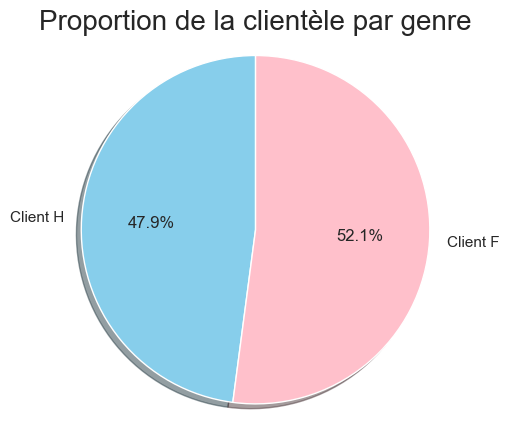

In [131]:
plt.figure(figsize=(5,5))

plt.title("Proportion de la clientèle par genre",size = 20)

labels = 'Client H', 'Client F',
sizes = [4132,4491]
colors = ['skyblue','pink']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')


plt.show()

In [132]:
df_customers.describe()

,age
count,8623.000000
mean,42.719123
std,16.919535
min,17.000000
25%,29.000000
50%,42.000000
75%,55.000000
max,92.000000


In [133]:
client_f = df_customers[df_customers['sex']=='f']
client_h = df_customers[df_customers['sex']=='m']

In [134]:
df_genre_age = pd.DataFrame(np.array([["17-29", 1085,1187], ["30-43", 1189, 1231], ["44-55", 866, 1001],["56-92", 982, 1072]]),
                   columns=['age', 'm', 'f'])

In [135]:
df_genre_age

,age,m,f
0,17-29,1085,1187
1,30-43,1189,1231
2,44-55,866,1001
3,56-92,982,1072


**Interprétation:**

* **1/4 des clients ont entre 17 et 29 ans**
* **50% des clients ont moins de 43 ans**
* **1/4 des clienrs ont entre 55 et 92 ans**

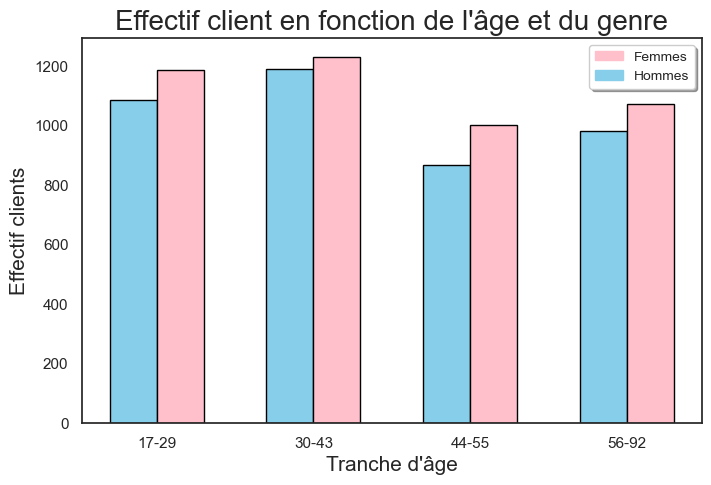

In [136]:
plt.figure(figsize=(8,5))

import matplotlib.patches as mpatches

largeur_barre = 0.3 # Largeur de chaque barre 

y1 = [1085, 1189, 866,982]
y2 = [1187, 1231, 1001,1072]
x1 = range(len(y1)) # Position des barres de la catégorie 1
x2 = [i + largeur_barre for i in x1] # Position des barres de la cat 2

plt.bar(x1, y1, width = largeur_barre, color = 'skyblue',edgecolor = 'black', linewidth = 1)

plt.bar(x2, y2, width = largeur_barre, color = 'pink',edgecolor = ['black' for i in y1], linewidth = 1)

plt.xticks([r + largeur_barre / 2 for r in range(len(y1))],['17-29', '30-43', '44-55','56-92'])

plt.title("Effectif client en fonction de l'âge et du genre", size = 20)

plt.xlabel("Tranche d'âge", size=15)
plt.ylabel("Effectif clients", size=15)

red_patch = mpatches.Patch(color='pink', label='Femmes')
blue_patch = mpatches.Patch(color='skyblue', label='Hommes')
plt.legend(handles=[red_patch,blue_patch],shadow=True , facecolor ='white',fontsize =10)

plt.show()

**Interprétation:**

* **Il y a 52.1% de femmes et 47.% d'hommes**
* **Les genres sont également réparties en fonctions des tranches d'âge (avec une légère superiorité pour les femmes)**

**Calcul du panier moyen :**

In [137]:
ticket_client = df_final.groupby(['session_id']).sum('price')

In [138]:
print('Le panier moyen est de ',ticket_client['price'].mean(),'€')

Le panier moyen est de  34.99287919533303 €


In [139]:
del ticket_client

## Objectif 4: Repartition du CA par client avec courbe de Lorenz

In [140]:
CA_client = rfm_df.sort_values(by='m',ascending=False)

In [141]:
len(CA_client)

8518

In [142]:
CA_client 

,client_id,r,f,m,r_score,f_score,m_score,sex,age,sex_m,sex_f,rfm_group
468,c_1422,8,218,3122.99,3,3,3,f,41,False,True,333
2486,c_3263,7,227,3072.44,3,3,3,f,36,False,True,333
3176,c_3892,7,204,3010.07,3,3,3,f,38,False,True,333
2516,c_3290,10,31,2951.01,2,2,3,m,24,True,False,223
7441,c_7773,13,59,2891.93,2,3,3,m,20,True,False,233
...,...,...,...,...,...,...,...,...,...,...,...,...
883,c_180,168,1,5.80,1,1,1,f,59,False,True,111
7816,c_8114,139,1,4.99,1,1,1,m,59,True,False,111
7065,c_743,189,1,4.99,1,1,1,f,53,False,True,111
7845,c_8140,142,1,4.15,1,1,1,m,50,True,False,111


**On divise par 5 pour avoir 5 tranches de 20% :**

In [143]:
m_client = CA_client['m']

In [144]:
part = round(len(m_client)/5)
print('Grandeur de chaque part de 20% =',part,'clients')

Grandeur de chaque part de 20% = 1704 clients


**On calcul le montant de chaque part :**

In [145]:
for i in range(5):
    print('Part',i+1,':',m_client[part*i:part*(i+1)].sum())

Part 1 : 2542007.06
Part 2 : 1423499.5
Part 3 : 907594.19
Part 4 : 539217.4199999999
Part 5 : 213773.03999999998


In [146]:
proportion_CA = pd.DataFrame(np.array([["0-20",m_client[:part].sum()], ["21-40", m_client[part:part*2].sum()], ["41-60",m_client[part*2:part*3].sum()],["61-80",m_client[part*3:part*4].sum()],["81-99",m_client[part*4:].sum()]]),
                   columns=['pourcent_client', 'CA'])

**Préparation du DataFrame que l'on va exploiter:**

In [147]:
proportion_CA['CA'] = proportion_CA['CA'].astype(float)

In [148]:
proportion_CA['pourcent_CA']=(proportion_CA['CA']*100)/proportion_CA['CA'].sum()

In [149]:
proportion_CA['pourcent_cum'] = np.cumsum(proportion_CA['pourcent_CA'])

In [150]:
proportion_CA

,pourcent_client,CA,pourcent_CA,pourcent_cum
0,0-20,2542007.06,45.182472,45.182472
1,21-40,1423499.50,25.301749,70.484221
2,41-60,907594.19,16.131878,86.616099
3,61-80,539217.42,9.584228,96.200328
4,81-99,213773.04,3.799672,100.000000


In [151]:
from matplotlib.ticker import PercentFormatter

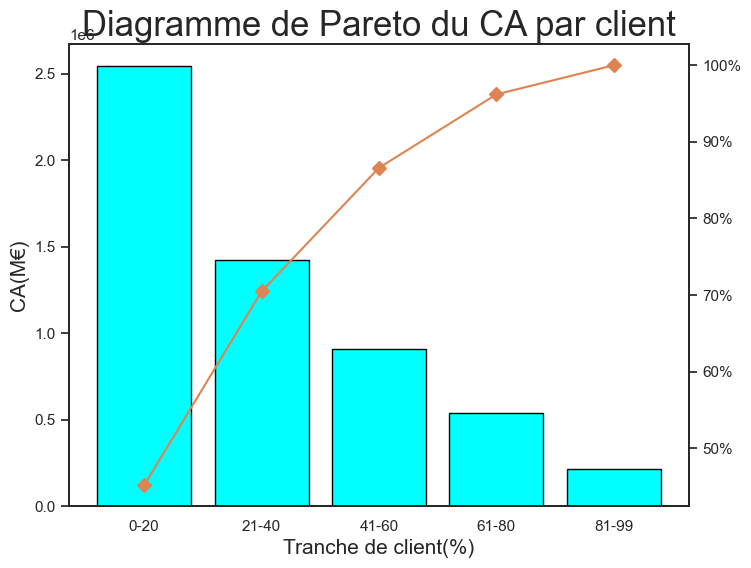

In [152]:
fig, ax = plt.subplots(figsize=(8,6))


ax.bar(proportion_CA['pourcent_client'],proportion_CA['CA'],color='cyan',edgecolor = 'black', linewidth = 1)

plt.xlabel('Tranche de client(%)', fontsize=15)
plt.ylabel("CA(M€)", fontsize=15) 

ax2 = ax.twinx()
ax2.plot(proportion_CA['pourcent_client'],proportion_CA['pourcent_cum'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title("Diagramme de Pareto du CA par client", fontsize=25)
plt.xticks(rotation= 45)

plt.show()

* **20% des plus gros consommateurs génèrent environ 45% du CA** 
* **Cela représente un risque moyen pour l'entreprise, en effet plus la part du CA est grande pour le risque est élevé en cas de perte de ces clients**

**Qui sont ses 20% clients les plus gors consommateurs et le reste des clients ?**

In [153]:
df_pareto = rfm_df

In [154]:
df_pareto = df_pareto.sort_values(by='m', ascending=False)

In [155]:
df_pareto['pourcent_client'] = 100/len(df_pareto)

In [156]:
df_pareto['pourcent_cumul'] = np.cumsum(df_pareto['pourcent_client'])

In [157]:
df_pareto

,client_id,r,f,m,r_score,f_score,m_score,sex,age,sex_m,sex_f,rfm_group,pourcent_client,pourcent_cumul
468,c_1422,8,218,3122.99,3,3,3,f,41,False,True,333,0.01174,0.011740
2486,c_3263,7,227,3072.44,3,3,3,f,36,False,True,333,0.01174,0.023480
3176,c_3892,7,204,3010.07,3,3,3,f,38,False,True,333,0.01174,0.035220
2516,c_3290,10,31,2951.01,2,2,3,m,24,True,False,223,0.01174,0.046959
7441,c_7773,13,59,2891.93,2,3,3,m,20,True,False,233,0.01174,0.058699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,c_180,168,1,5.80,1,1,1,f,59,False,True,111,0.01174,99.953041
7816,c_8114,139,1,4.99,1,1,1,m,59,True,False,111,0.01174,99.964780
7065,c_743,189,1,4.99,1,1,1,f,53,False,True,111,0.01174,99.976520
7845,c_8140,142,1,4.15,1,1,1,m,50,True,False,111,0.01174,99.988260


In [158]:
df_pareto_20 = df_pareto[df_pareto['pourcent_cumul']<21]
df_pareto_80 = df_pareto[df_pareto['pourcent_cumul']>20]

In [159]:
df_group_20 = df_pareto_20.groupby(['rfm_group']).agg({'sex_m':'sum','sex_f':'sum','client_id':'count','m':'sum','age':'mean'}).sort_values(by='client_id',ascending=False)

In [160]:
df_group_80 = df_pareto_80.groupby(['rfm_group']).agg({'sex_m':'sum','sex_f':'sum','client_id':'count','m':'sum','age':'mean'}).sort_values(by='client_id',ascending=False)

In [161]:
df_group_80['sex_m_percent'] = (df_group_80['sex_m']*100)/len(df_pareto)
df_group_20['sex_m_percent'] = (df_group_20['sex_m']*100)/len(df_pareto)
df_group_80['sex_f_percent'] = (df_group_80['sex_f']*100)/len(df_pareto)
df_group_20['sex_f_percent'] = (df_group_20['sex_f']*100)/len(df_pareto)
df_group_80['CA_percent'] = (df_group_80['m']*100)/df_pareto['m'].sum()
df_group_20['CA_percent'] = (df_group_20['m']*100)/df_pareto['m'].sum()
df_group_20['ratio_CA_client'] = df_group_20['CA_percent']/(df_group_20['sex_m_percent']+df_group_20['sex_f_percent'])
df_group_80['ratio_CA_client'] = df_group_80['CA_percent']/(df_group_80['sex_m_percent']+df_group_80['sex_f_percent'])
df_group_20['percent_client'] = df_group_20['sex_m_percent'] + df_group_20['sex_f_percent']
df_group_80['percent_client'] = df_group_80['sex_m_percent'] + df_group_80['sex_f_percent']

In [162]:
df_group_20.sort_values(by='ratio_CA_client',ascending= False)

,sex_m,sex_f,client_id,m,age,sex_m_percent,sex_f_percent,CA_percent,ratio_CA_client,percent_client
rfm_group,,,,,,,,,,
133,3,2,5,7980.16,38.000000,0.035220,0.023480,0.141842,2.416420,0.058699
333,358,369,727,1111265.83,43.259972,4.202865,4.332003,19.752005,2.314272,8.534867
323,66,87,153,221791.54,22.882353,0.774830,1.021367,3.942196,2.194747,1.796196
233,258,293,551,796787.51,44.074410,3.028880,3.439775,14.162364,2.189383,6.468655
223,145,138,283,399656.43,23.162544,1.702278,1.620099,7.103625,2.138116,3.322376
123,28,31,59,80218.11,22.491525,0.328716,0.363935,1.425823,2.058502,0.692651
113,0,2,2,2515.77,22.000000,0.000000,0.023480,0.044716,1.904460,0.023480
213,1,3,4,4982.22,21.750000,0.011740,0.035220,0.088556,1.885792,0.046959
313,3,1,4,4515.95,23.500000,0.035220,0.011740,0.080268,1.709307,0.046959


In [163]:
df_group_80

,sex_m,sex_f,client_id,m,age,sex_m_percent,sex_f_percent,CA_percent,ratio_CA_client,percent_client
rfm_group,,,,,,,,,,
222,836,902,1738,918116.69,46.836018,9.814510,10.589340,16.318909,0.799796,20.403851
111,453,496,949,110989.53,43.861960,5.318150,5.822963,1.972764,0.177071,11.141113
322,363,426,789,432392.00,49.003802,4.261564,5.001174,7.685478,0.829720,9.262738
122,280,317,597,278119.02,40.936348,3.287157,3.721531,4.943379,0.705322,7.008687
211,260,278,538,75162.51,47.263941,3.052360,3.263677,1.335963,0.211519,6.316037
232,167,165,332,261143.24,43.189759,1.960554,1.937074,4.641646,1.190890,3.897629
112,128,140,268,123000.42,23.638060,1.502700,1.643578,2.186250,0.694869,3.146278
221,122,133,255,56281.01,50.349020,1.432261,1.561399,1.000357,0.334159,2.993660
332,114,127,241,191209.58,45.950207,1.338342,1.490960,3.398622,1.201223,2.829303


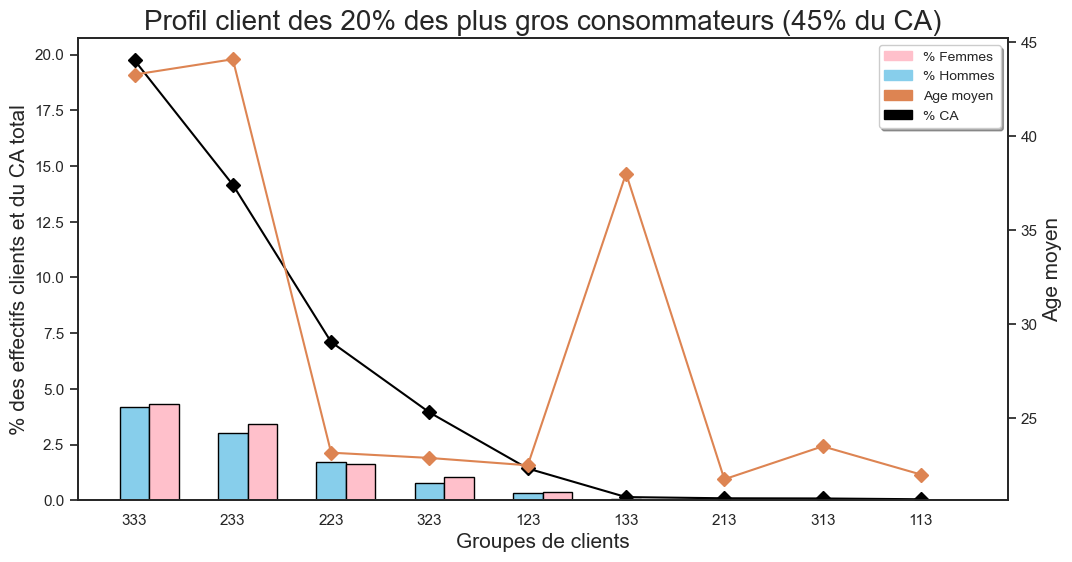

In [164]:
fig, ax = plt.subplots(figsize=(12,6))

sns.set_theme(style = "white")

import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

largeur_barre = 0.3 # Largeur de chaque barre 

y1 = df_group_20['sex_m_percent']
y2 = df_group_20['sex_f_percent']
x1 = range(len(y1)) # Position des barres de la catégorie 1
x2 = [i + largeur_barre for i in x1] # Position des barres de la cat 2

ax.bar(x1, y1, width = largeur_barre, color = 'skyblue',edgecolor = 'black', linewidth = 1)

ax.bar(x2, y2, width = largeur_barre, color = 'pink',edgecolor = ['black' for i in y1], linewidth = 1)

ax.plot(df_group_20.index,df_group_20['CA_percent'], color="black", marker="D", ms=7)

plt.xticks([r + largeur_barre / 2 for r in range(len(y1))],df_group_20.index)

plt.title("Profil client des 20% des plus gros consommateurs (45% du CA)", size = 20)

plt.xlabel("Groupes de clients", size=15)
plt.ylabel("% des effectifs clients et du CA total", size=15)

ax2 = ax.twinx()
ax2.plot(df_group_20.index,df_group_20['age'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel('Age moyen',size=15)

red_patch = mpatches.Patch(color='pink', label='% Femmes')
blue_patch = mpatches.Patch(color='skyblue', label='% Hommes')
orange_patch = mpatches.PathPatch(path='plot',color='C1',label='Age moyen')
black_patch = mpatches.PathPatch(path='plot',color='black',label='% CA')
plt.legend(handles=[red_patch,blue_patch,orange_patch,black_patch],shadow=True , facecolor ='white',fontsize =10)


plt.show()

In [165]:
df_group_80 = df_group_80.sort_values(by='CA_percent',ascending=False)

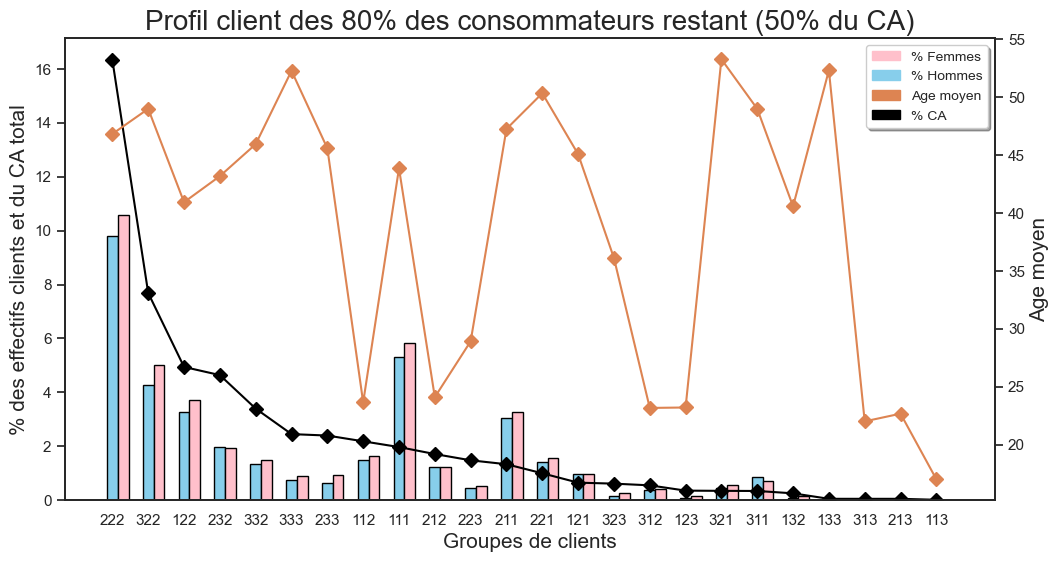

In [166]:
fig, ax = plt.subplots(figsize=(12,6))

import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

largeur_barre = 0.3 # Largeur de chaque barre 

y1 = df_group_80['sex_m_percent']
y2 = df_group_80['sex_f_percent']
x1 = range(len(y1)) # Position des barres de la catégorie 1
x2 = [i + largeur_barre for i in x1] # Position des barres de la cat 2

ax.bar(x1, y1, width = largeur_barre, color = 'skyblue',edgecolor = 'black', linewidth = 1)

ax.bar(x2, y2, width = largeur_barre, color = 'pink',edgecolor = ['black' for i in y1], linewidth = 1)

ax.plot(df_group_80.index,df_group_80['CA_percent'], color="black", marker="D", ms=7)

plt.xticks([r + largeur_barre / 2 for r in range(len(y1))],df_group_80.index)

plt.title("Profil client des 80% des consommateurs restant (50% du CA)", size = 20)

plt.xlabel("Groupes de clients", size=15)
plt.ylabel("% des effectifs clients et du CA total", size=15)

ax2 = ax.twinx()
ax2.plot(df_group_80.index,df_group_80['age'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel('Age moyen',size=15)

red_patch = mpatches.Patch(color='pink', label='% Femmes')
blue_patch = mpatches.Patch(color='skyblue', label='% Hommes')
orange_patch = mpatches.PathPatch(path='plot',color='C1',label='Age moyen')
black_patch = mpatches.PathPatch(path='plot',color='black',label='% CA')
plt.legend(handles=[red_patch,blue_patch,orange_patch,black_patch],shadow=True , facecolor ='white',fontsize =10)

plt.show()

In [167]:
rfm_group['CA_cumul'] = rfm_group['CA_percent'].cumsum()
rfm_group['client_cumul'] = rfm_group['client_percent'].cumsum()

<ipython-input-167-ae2d5ee3decf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_group['CA_cumul'] = rfm_group['CA_percent'].cumsum()
<ipython-input-167-ae2d5ee3decf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_group['client_cumul'] = rfm_group['client_percent'].cumsum()


In [168]:
rfm_group_20 = rfm_group[rfm_group['ratio_CA_client']>1.2]

In [169]:
rfm_group

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent,CA_cumul,client_cumul
rfm_group,,,,,,,,,,,,
333,839,1221143.85,429,410,44.541120,9.845107,20.093003,2.040913,5.034030,4.811077,20.093003,9.845107
323,182,250193.51,105,77,25.159341,2.135649,4.116746,1.927632,1.232105,0.903544,24.209748,11.980756
133,8,10983.44,3,5,43.375000,0.093875,0.180724,1.925165,0.035203,0.058672,24.390473,12.074630
233,663,906740.34,357,306,44.280543,7.779864,14.919730,1.917737,4.189157,3.590706,39.310202,19.854494
223,348,463106.58,171,177,24.505747,4.083548,7.620070,1.866041,2.006571,2.076977,46.930272,23.938043
123,70,90898.45,37,33,22.357143,0.821403,1.495666,1.820866,0.434170,0.387233,48.425938,24.759446
113,3,3499.81,2,1,20.333333,0.035203,0.057587,1.635847,0.023469,0.011734,48.483525,24.794649
213,7,7957.96,5,2,22.142857,0.082140,0.130942,1.594128,0.058672,0.023469,48.614467,24.876789
313,7,7493.41,1,6,22.857143,0.082140,0.123298,1.501070,0.011734,0.070406,48.737765,24.958930


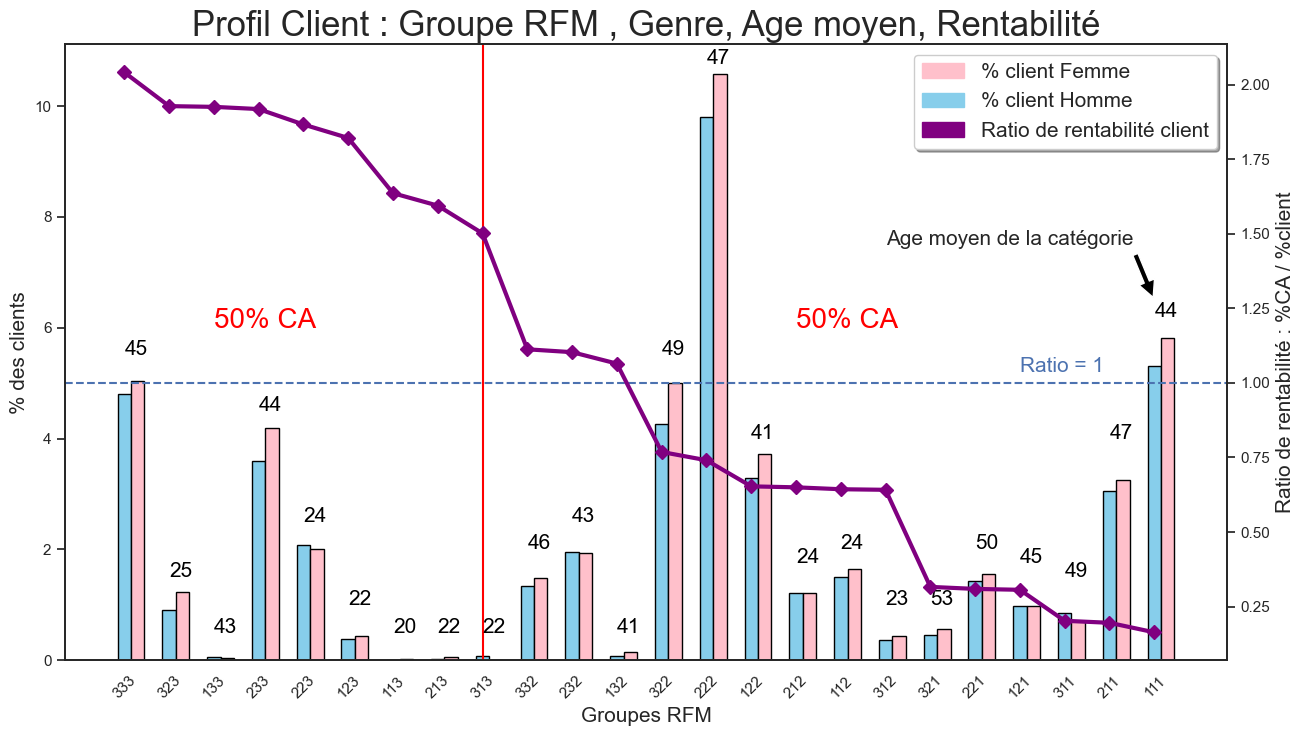

In [170]:
fig, ax = plt.subplots(figsize=(15,8))

import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

largeur_barre = 0.3

y1 = rfm_group['sex_m_percent']
y2 = rfm_group['sex_f_percent']
x1 = range(len(y1)) # Position des barres de la catégorie 1
x2 = [i + largeur_barre for i in x1] # Position des barres de la cat 2

ax.bar(x1, y1, width = largeur_barre, color = 'skyblue',edgecolor = 'black', linewidth = 1)

ax.bar(x2, y2, width = largeur_barre, color = 'pink',edgecolor = ['black' for i in y1], linewidth = 1)


plt.ylabel("% des clients", fontsize=15)


plt.axvline(x='313',color='red')
plt.axhline(y=5,linestyle='--')

plt.text('121',5.2, 'Ratio = 1',fontsize=15, color='b')
plt.text('133',6, '50% CA',fontsize=20, color='red')
plt.text('212',6, '50% CA',fontsize=20, color='red')


y=[45,25,43,44,24,22,20,22,22,46,43,41,49,47,41,24,24,23,53,50,45,49,47,44]
z=[5.5,1.5,0.5,4.5,2.5,1.0,0.5,0.5,0.5,2,2.5,0.5,5.5,10.75,4,1.75,2,1,1,2,1.75,1.5,4,6.2]

for i in range (len(y)):
    plt.text(rfm_group.index[i],z[i],y[i],fontsize=15, color='black')

ax.annotate('Age moyen de la catégorie', xy=('111',6.5), xytext=('312',7.5),size=15,    # Pour la flèche légendée
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Groupes RFM', fontsize=15)
plt.ylabel("% des clients", fontsize=15)
plt.title("Profil Client : Groupe RFM , Genre, Age moyen, Rentabilité", fontsize=25)
plt.xticks(rfm_group.index,rotation= 45)


ax2 = ax.twinx()
ax2.plot(rfm_group.index,rfm_group['ratio_CA_client'], color="purple", linewidth = 3,marker="D", ms=7)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel('Ratio de rentabilité : %CA / %client',size=15)

orange_patch = mpatches.Patch(color='pink',label='% client Femme')
gold_patch = mpatches.Patch(color='skyblue', label='% client Homme ')
purple_patch = mpatches.Patch(color='purple', label='Ratio de rentabilité client')
plt.legend(handles=[orange_patch,gold_patch,purple_patch],shadow=True , facecolor ='white',fontsize =15)

sns.set_theme(style = "dark") 

plt.show()

### **BILAN : Profil type client**

* **Il y a 47.9% d'Hommes et 52.1% de Femmes**
* **20% des plus gros consommateurs représentent environ 50% du CA global**
* **Ces 20% de clients (qui représentent 50% du CA global)sont en partie des clients fidèles (333 et 233) de 43 ans en moyenne et un peu moins fidèles (223 et 323) de 23 ans en moyenne. Tous ces groupes ont un % CA > % client**
* **Les 80% des clients restant (qui représentent 50% du CA global) sont majoritairement des clients 'moyen' (222) de 46 ans en moyenne et de clients non fidèles (111) de 43 ans en moyenne. Tous ces groupes ont un % CA < % client** 
* **20.3% des clients sont des clients "moyen" (222) de 46 ans en moyenne qui représente 16% du CA global**
* **11.1% des clients sont des clients à aller chercher (111) de 43 ans en moyenne qui représente 2% du CA global**
* **19% des clients sont des clients "très fidèles" et "moyennement fidèles" (333 et 322) de 42 et 42 ans en moyenne**
* **1/4 des clients ont entre 17 et 29 ans**
* **50% des clients ont moins de 43 ans**
* **1/4 des clients ont entre 55 et 92 ans**
* **Les genres sont également réparties en fonctions des tranches d'âge (avec une légère superiorité pour les femmes)**
* **Le panier moyen est de 34.99 €** 

### Préconisations :

* **Relancer les clients qui ont un R=1 par mail ou sms et leur proposer une promo ciblé sur la catégorie de produit qu'ils achètent le plus (ou sur toutes les catégories)**
* **Entretenir la fidélité de nos client qui consommes le plus (20% des clients) par divers offres (promotion , parainage puisqu'ils aiment notre site)**
* **Tenter de transformer les clients 222 (qui représentent environ 20% des clients) en 333 en diversifiant l'offre et en mettant en avant les produits qu'il sont susceptible d'aimer**

### Représentation de la répartition du CA par client grâce à la courbe de Lorenz

In [171]:
ca_client = pd.DataFrame(columns = ['client_id','CA'])

In [172]:
ca_client['client_id']=df_final['client_id']
ca_client['CA']=df_final['price']

In [173]:
ca_client = ca_client.groupby('client_id').sum('CA').sort_values(by='CA')

In [174]:
ca_client['CA'].max()

163447.19

In [175]:
ca_client['freq_cumul'] = ca_client['CA']/ca_client['CA'].max()

In [176]:
len(ca_client)

8522

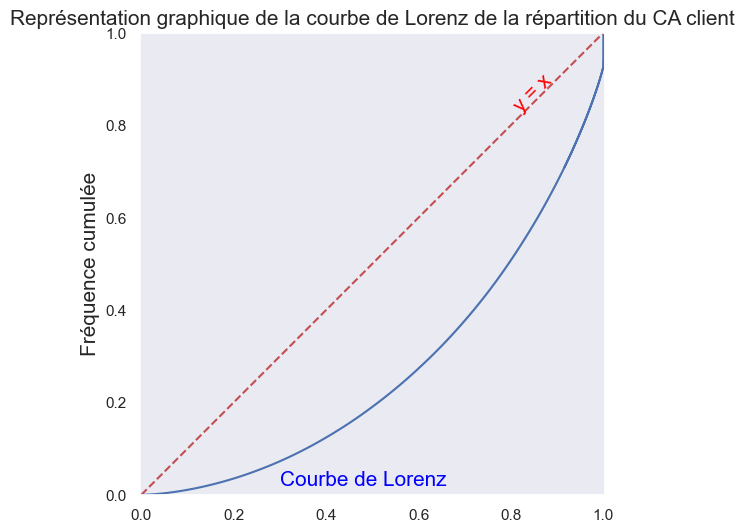

In [177]:
fig = plt.figure(figsize=(6,6))

n = len(ca_client)
lorenz =  np.cumsum(np.sort(ca_client['CA'])) / ca_client['CA'].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

x=[0,1]
y=[0,1]

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(x,y,'r--')

plt.axis([0.0,1.0,0.0,1.0]) # limite la valeur d'affichage des abscisses et ordonnées

plt.text(0.8,0.83, 'y = x',fontsize=15,color='red',rotation=45)
plt.text(0.3,0.02, 'Courbe de Lorenz',fontsize=15,color='blue')

plt.ylabel('Fréquence cumulée', fontsize = 15)

plt.title('Représentation graphique de la courbe de Lorenz de la répartition du CA client',size=15)

plt.show()

In [178]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

In [179]:
print("L'indicateur de gini =",gini)

L'indicateur de gini = 0.45905572909533543


**Interprétation : La répartition du CA client est "moyenne" , en effet, si l'indicateur de Gini étais proche de 1 , cela voudrais dire que la répartition du CA est très inégale et inversement, s'il était proche de 0 , cela signifierai que la répartition est égale d'un client à l'autre**

**Remarque : Il pourrais être intéressant de faire également cette étude pour le prix des produits**

# Partie 2 : ###

 * Etablir le lien entre le genre d'un client et la categorie de produit achetée
 * Lien entre l'âge du client et le montant total de ses achats , fréquence d'achat, taille du panier moyen et catégorie de livres
 * Calculer la proba qu'un client achète la réference 0_525 sachant qu'il à acheté la réference 2_159

## Objectif 1: Etablir le lien entre le genre d'un client et la categorie de produit achetée (méthode chi-2)

**Ici on utilise la méthode 'Chi-2' car les variables genre de client et catégories de produits sont qualitatives**


* **On considère l'hypothèse nulle (H0) : Les variables genre d'un client et catégories de produits ne sont pas corrélées**
* **On considère l'hypothèse alternative (Ha) : Les variables genre d'un client et catégories de produits sont corrélées**

**On commence par créer le tableau de contigence :**

In [180]:
tableau_cont = df_merge[['sex','categ']].pivot_table(index='sex',columns='categ',aggfunc=len)

In [181]:
tableau_cont

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [182]:
tableau_cont = tableau_cont.astype(int)

In [183]:
tx = df_merge['sex'].value_counts()
ty = df_merge['categ'].value_counts()

**Création du tableau 'Valeurs attendus':**

In [184]:
tx_df = pd.DataFrame(tx)
tx_df.columns = ["c"]
ty_df = pd.DataFrame(ty)
ty_df.columns = ["c"]

# Valeurs total observées
n = len(df_merge)

# Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df.dot(ty_df.T) / n)

indep = indep.astype(int)

In [185]:
indep

,0.0,1.0,2.0
m,208613,114007,18309
f,207066,113161,18173


**Calcul du tableau 'Ecart au carré normalisé de la valeur attendue VS valeur observée':**

In [186]:
freq = (tableau_cont-indep)**2/indep

In [187]:
freq

categ,0.0,1.0,2.0
f,3.456463,26.693331,43.586640
m,3.438947,26.464770,43.360151


**Calcul du Chi-2 :**

In [188]:
chi2 = freq.sum().sum()

In [189]:
chi2

147.00030062852883

**Aperçu de l'indépendance des variable par une Heatmap :**

* Plus la différence des valeurs entre le tableau de contingence et celui des valeurs attendues est grande, plus la case est sombre
* Plus la différence des valeurs entre le tableau de contingence et celui des valeurs attendues est petite, plus la case est claire

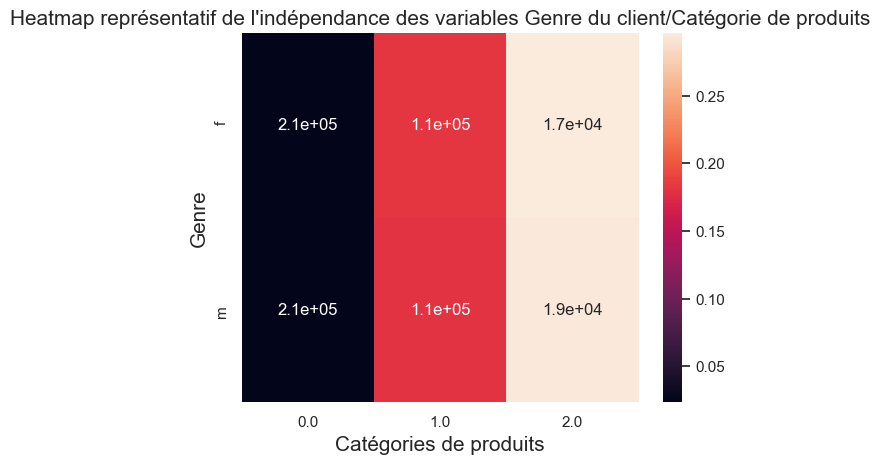

In [190]:
table = freq/147 # car chi2=147
sns.heatmap(table,annot=tableau_cont)
plt.title("Heatmap représentatif de l'indépendance des variables Genre du client/Catégorie de produits",size=15)
plt.ylabel('Genre', fontsize = 15)
plt.xlabel('Catégories de produits', fontsize = 15)
plt.show()

**Interprétation :**
* La catégorie 0 semble dévoilé une dépendance entre les 2 variables alors que la catégorie 2 semble montrée le contraire
* La catégorie 0 étant largement majoritaire par rapport aux autres catégories, on peut supposer que les variables sont corrélées

**Calcul du Chi-2 et p-value à partir de  scipy.stats puis interprétations :**

In [191]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(tableau_cont)
print('Degré de liberté (dof)=%d' % dof)
print('Tableau des fréquences attendues:\n')
print(expected,'\n')
# interpret test-statistic
print('Interprétation par test statistiques :\n')
prob = 0.95
critical = chi2.ppf(prob, dof)
print('Probabilité =%.3f, Valeur critique =%.3f, Stat(chi-2)=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print("Chi-2 >= Valeur critique : Les variables sont dépendantes (rejeter l'hypothèse nulle, ou H0)\n")
else:
	print("Chi-2 < Valeur critique : Les variables sont indépendantes (ne pas rejeter l'hypothèse nulle, ou H0)\n")
# interpret p-value
print('Interprétation par la p_value :\n')
alpha = 1.0 - prob
print('Niveau de signification(alpha)=%.3f, p_value=%.3f' % (alpha, p))
if p <= alpha:
	print("p_value <= alpha : Les variables sont dépendantes (rejeter l'hypothèse nulle, ou H0)")
else:
	print("p_value > alpha : Les variables sont indépendantes (ne pas rejeter l'hypothèse nulle, ou H0)")

Degré de liberté (dof)=2
Tableau des fréquences attendues:

[[207066.56444861 113161.81769444  18173.61785695]
 [208613.43555139 114007.18230556  18309.38214305]] 

Interprétation par test statistiques :

Probabilité =0.950, Valeur critique =5.991, Stat(chi-2)=147.003
Chi-2 >= Valeur critique : Les variables sont dépendantes (rejeter l'hypothèse nulle, ou H0)

Interprétation par la p_value :

Niveau de signification(alpha)=0.050, p_value=0.000
p_value <= alpha : Les variables sont dépendantes (rejeter l'hypothèse nulle, ou H0)


### Conclusion : 

**Les variables "catégorie de produits achetés" et "genre du client" sont corrélées (dépendance possible)**

## Objectif 2 : Etablir le lien entre l'âge des clients et ...
* Le montant total des achats
* La fréquence d'achat
* La taille du panier moyen
* La catégorie de livres achetés

**Création du dataFrame qui va contenir toutes ses informations:**

In [192]:
df_final['cat_0'] = df_final['categ']==0
df_final['cat_1'] = df_final['categ']==1
df_final['cat_2'] = df_final['categ']==2

df_merge_age = df_final.groupby('age').sum('price')

df_by_age = pd.DataFrame(df_merge_age.index,columns =['age'])

del df_merge_age['categ']

nb_client_age = df_customers.groupby('age').count()

df_merge_age['nb_achat'] = df_merge_age['cat_0']+df_merge_age['cat_1']+df_merge_age['cat_2']
df_merge_age['%cat_0'] = (df_merge_age['cat_0']*100)/df_merge_age['nb_achat']
df_merge_age['%cat_1'] = (df_merge_age['cat_1']*100)/df_merge_age['nb_achat']
df_merge_age['%cat_2'] = (df_merge_age['cat_2']*100)/df_merge_age['nb_achat']
df_merge_age['panier_moyen'] = df_merge_age['price']/df_merge_age['nb_achat']
df_merge_age['%taille_panier'] = (df_merge_age['nb_achat']*100)/sum(df_merge_age['nb_achat'])
df_merge_age['nb_client'] = nb_client_age['client_id']
df_merge_age['freq_achat'] = df_merge_age['nb_client']/df_merge_age['nb_achat']

In [193]:
df_merge_age

,price,cat_0,cat_1,cat_2,nb_achat,%cat_0,%cat_1,%cat_2,panier_moyen,%taille_panier,nb_client,freq_achat
age,,,,,,,,,,,,
17,309934.21,1693,3057,3049,7799,21.707911,39.197333,39.094756,39.740250,2.262482,440,0.056417
18,90211.81,417,877,906,2200,18.954545,39.863636,41.181818,41.005368,0.638218,146,0.066364
19,93312.36,513,929,930,2372,21.627319,39.165261,39.207420,39.339106,0.688115,146,0.061551
20,92810.11,499,812,883,2194,22.743847,37.010027,40.246126,42.301782,0.636477,129,0.058797
21,86519.64,558,851,890,2299,24.271422,37.016094,38.712484,37.633597,0.666937,136,0.059156
...,...,...,...,...,...,...,...,...,...,...,...,...
88,2817.45,76,97,1,174,43.678161,55.747126,0.574713,16.192241,0.050477,8,0.045977
89,2390.54,52,91,1,144,36.111111,63.194444,0.694444,16.600972,0.041774,6,0.041667
90,1346.52,44,39,2,85,51.764706,45.882353,2.352941,15.841412,0.024658,4,0.047059


**Création du DataFrame de liaison entre l'id_client et le nombre de session :** 

In [194]:
df_ticket = pd.DataFrame()
df_ticket['session_id'] = df_merge['session_id']
df_ticket['client_id'] = df_merge['client_id']
df_ticket = df_ticket.drop_duplicates(keep='first')
df_ticket = df_ticket.groupby(['client_id']).count()

**Création du df_client:**

In [195]:
df_client = df_final.groupby(["client_id"]).sum('price')
df_client = df_client.merge(df_customers, how='inner', on='client_id')
df_client = df_client.merge(df_ticket, how='inner',on='client_id')
df_client['total_livre'] = df_client['cat_0'] + df_client['cat_1'] + df_client['cat_2']
df_client['panier_moyen'] = df_client['price']/df_client['session_id']
df_client['freq_achat'] = df_client['session_id']/sum(df_client['session_id'])
df_client = df_client.rename(columns={'age_y':'age'})

del df_client['age_x']
del df_client['categ']

In [196]:
df_client['compteur_client']= df_client['session_id']/df_client['session_id']

In [197]:
df_client

,client_id,price,cat_0,cat_1,cat_2,sex,age,session_id,total_livre,panier_moyen,freq_achat,compteur_client
0,c_1,219.23,16,2,0,m,66,33,18,6.643333,0.000096,1.0
1,c_10,602.93,8,15,2,m,65,34,25,17.733235,0.000099,1.0
2,c_100,31.98,0,2,0,m,29,5,2,6.396000,0.000015,1.0
3,c_1000,1467.14,22,54,0,f,55,93,76,15.775699,0.000272,1.0
4,c_1001,669.70,28,15,0,m,39,47,43,14.248936,0.000137,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,c_995,70.33,6,0,0,m,66,9,6,7.814444,0.000026,1.0
8518,c_996,854.92,23,28,0,f,51,79,51,10.821772,0.000231,1.0
8519,c_997,906.13,12,14,9,f,27,24,35,37.755417,0.000070,1.0
8520,c_998,1179.06,7,5,13,m,20,23,25,51.263478,0.000067,1.0


In [198]:
df_age = df_client.groupby('age').agg({'price':'sum','cat_0':'sum','cat_1':'sum','cat_2':'sum','total_livre':'sum','panier_moyen':'mean','freq_achat':'sum','compteur_client':'sum'})

In [199]:
df_age

,price,cat_0,cat_1,cat_2,total_livre,panier_moyen,freq_achat,compteur_client
age,,,,,,,,
17,309934.21,1693,3057,3049,7799,34.890795,0.025075,429.0
18,90211.81,417,877,906,2200,35.641700,0.007480,142.0
19,93312.36,513,929,930,2372,34.537488,0.007597,144.0
20,92810.11,499,812,883,2194,38.193710,0.007097,124.0
21,86519.64,558,851,890,2299,35.611583,0.007059,133.0
...,...,...,...,...,...,...,...,...
88,2817.45,76,97,1,174,17.913852,0.000678,7.0
89,2390.54,52,91,1,144,13.100059,0.000602,6.0
90,1346.52,44,39,2,85,15.863690,0.000281,4.0


### **A) Etablir le lien entre l'âge et le montant total des achats des clients (Pearson):**

**PEARSON : Le coefficient de corrélation de pearson mesure une corrélation linéaire entre deux variables. Dans le cas où la méthode utilisée est de type “kendall” ou “spearman”, les statistiques tau de kendall et rho de Spearman sont respectivement utilisées pour estimer le coefficient de corrélation basé sur le rang.**   

**SPEARMAN: Le coefficient de Spearman permet de détecter des tendances monotones. Lorsque la tendance est affine, il se comporte de façon similaire au coefficient de Pearson. ... Plus la tendance monotone est marquée, plus la valeur du coefficient est proche de 1 ou -1.**

**KENDALL : S'applique pour les effectifs qui ne suivent pas une distribution normale**

**Interprétation pour la méthode de Pearson (P) :**

* Le coefficient de corrélation de Pearson peut prendre n'importe quelle valeur réelle dans la plage −1 ≤ P ≤ 1.

* La valeur maximale r = 1 correspond au cas où il existe une relation linéaire positive parfaite entre x et y . En d'autres termes, des valeurs x plus grandes correspondent à des valeurs y plus grandes et vice versa.

* La valeur P > 0 indique une corrélation positive entre x et y .

* La valeur P = 0 correspond au cas où il n'y a pas de relation linéaire entre x et y .

* La valeur P < 0 indique une corrélation négative entre x et y .

* La valeur minimale P = −1 correspond au cas où il existe une relation linéaire négative parfaite entre x et y . En d'autres termes, des valeurs x plus grandes correspondent à des valeurs y plus petites et vice versa.

* Si P plus proche de 1 que S dans le cas d'une corrélation positive ou plus proche de -1 dans le cas d'une corrélation négative : La corrélation est d'avantage linéaire plutot que monotone.
___________



In [200]:
import scipy.stats

In [201]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

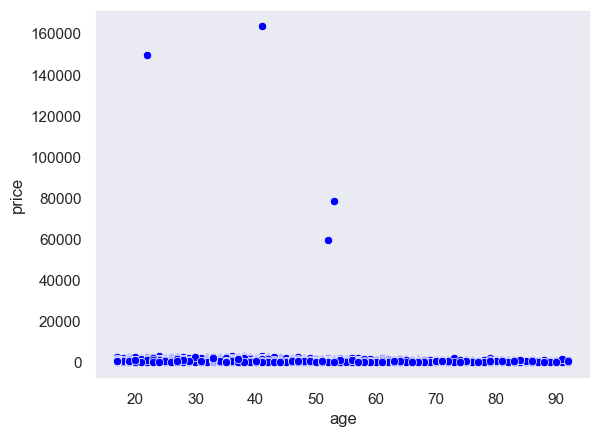

In [202]:
sns.scatterplot(data=df_client,x='age', y='price', color='blue')
plt.show()

**On se sépare des outliers :**

In [203]:
df_price = pd.DataFrame({'age':df_client['age'],'price':df_client['price']})

In [204]:
df_price = df_price[df_price['price']<25000]

In [205]:
df_price_mean = df_price.groupby(['age']).mean()

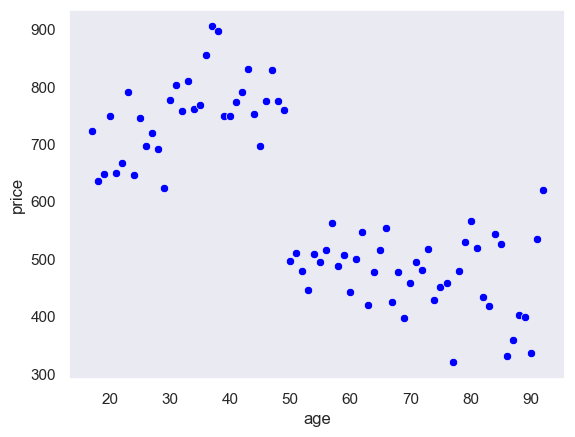

In [206]:
sns.scatterplot(data=df_price_mean,x='age', y='price', color='blue')
plt.show()

In [207]:
S = scipy.stats.spearmanr(df_price['age'], df_price['price']).correlation
print('S =',S)

S = -0.16948316137276961


In [208]:
P = scipy.stats.pearsonr(df_price['age'], df_price['price'])
print('P =',P)

P = (-0.1797391837235139, 8.972832058561892e-63)


**P<0 et P plus proche de -1 que S : il existe une corrélation linéaire négative entre les 2 variables**

### B) Recherche de corrélation entre l'âge et le panier moyen (montant):


In [209]:
df_age

,price,cat_0,cat_1,cat_2,total_livre,panier_moyen,freq_achat,compteur_client
age,,,,,,,,
17,309934.21,1693,3057,3049,7799,34.890795,0.025075,429.0
18,90211.81,417,877,906,2200,35.641700,0.007480,142.0
19,93312.36,513,929,930,2372,34.537488,0.007597,144.0
20,92810.11,499,812,883,2194,38.193710,0.007097,124.0
21,86519.64,558,851,890,2299,35.611583,0.007059,133.0
...,...,...,...,...,...,...,...,...
88,2817.45,76,97,1,174,17.913852,0.000678,7.0
89,2390.54,52,91,1,144,13.100059,0.000602,6.0
90,1346.52,44,39,2,85,15.863690,0.000281,4.0


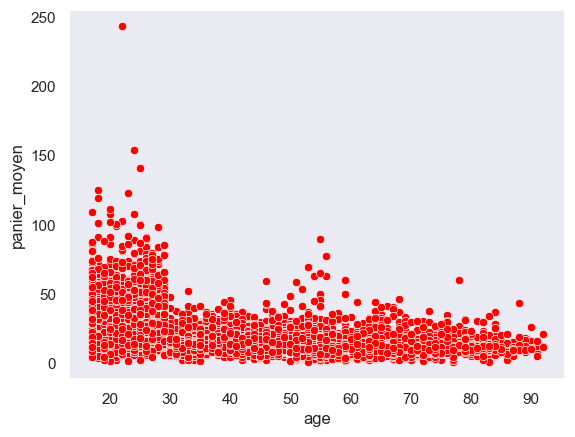

In [210]:
sns.scatterplot(data=df_client,x='age', y='panier_moyen', color='red')
plt.show()

In [211]:
df_client_mean = df_client.groupby(['age']).agg({'panier_moyen':'mean'})

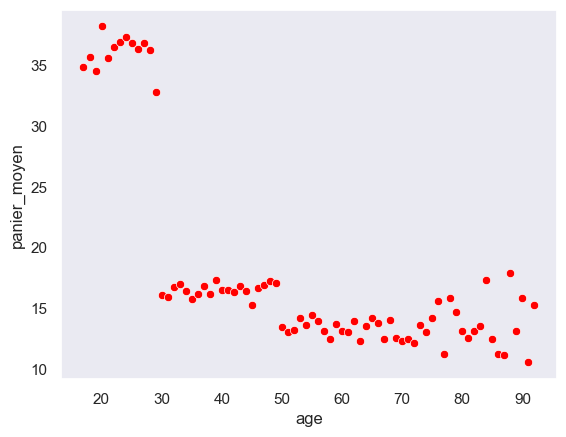

In [212]:
sns.scatterplot(data=df_client_mean,x='age', y='panier_moyen', color='red')
plt.show()

In [213]:
S = scipy.stats.spearmanr(df_client['age'], df_client['panier_moyen']).correlation
print('S =',S)

S = -0.5962659748867529


In [214]:
P = scipy.stats.pearsonr(df_client['age'], df_client['panier_moyen'])
print('P =',P)

P = (-0.5258366690152074, 0.0)


**P<0 et S plus proche de -1 que P : il existe une corrélation monotone entre les 2 variables**

### B) Recherche de corrélation entre l'âge et le panier moyen (nombre d'article):

In [215]:
df_session = df_final.groupby(['session_id']).agg({'age':'mean','id_prod':'count'})

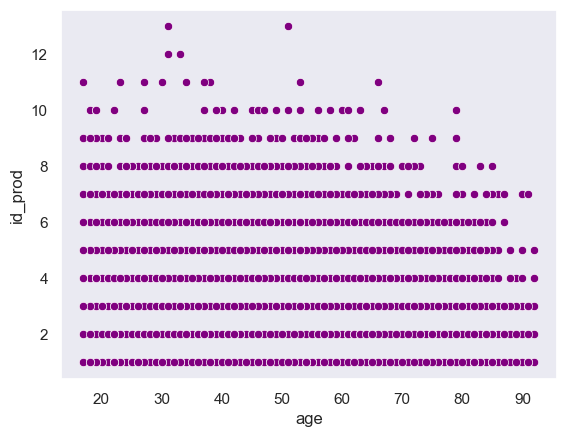

In [216]:
sns.scatterplot(data=df_session,x='age', y='id_prod', color='purple')
plt.show()

In [217]:
S = scipy.stats.spearmanr(df_session['age'], df_session['id_prod']).correlation
print('S =',S)

S = -0.21255363927136692


In [218]:
P = scipy.stats.pearsonr(df_session['age'], df_session['id_prod'])
print('P =',P)

P = (-0.1669484137649367, 0.0)


**P<0 et S plus proche de -1 que P : il existe une corrélation monotone entre les 2 variables**

### C) Lien entre l'age et la fréquence des achats :

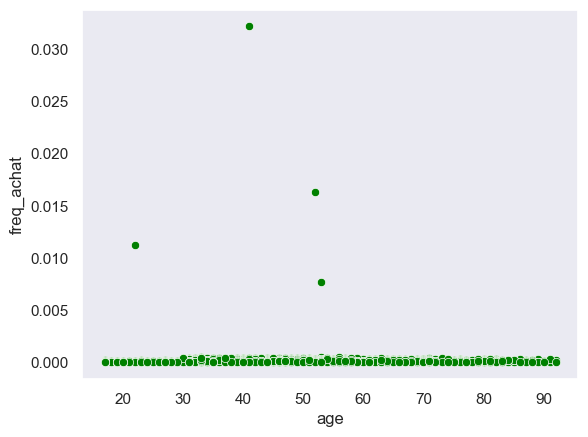

In [219]:
sns.scatterplot(data=df_client,x='age', y='freq_achat', color='green')
plt.show()

In [220]:
df_freq = df_client[df_client['freq_achat']<0.005]

In [221]:
df_freq_mean = df_freq.groupby(['age']).agg({'freq_achat':'mean'})

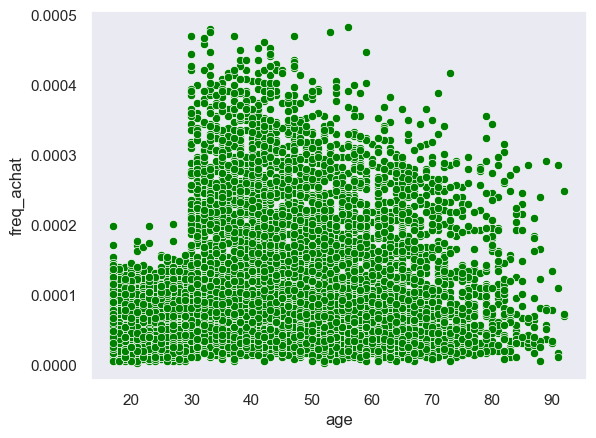

In [222]:
sns.scatterplot(data=df_freq,x='age', y='freq_achat', color='green')
plt.show()

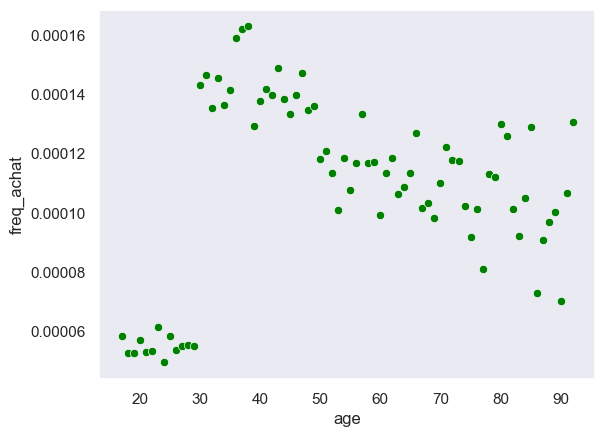

In [223]:
sns.scatterplot(data=df_freq_mean,x='age', y='freq_achat', color='green')
plt.show()

In [224]:
S = scipy.stats.spearmanr(df_client['age'], df_client['freq_achat']).correlation
print('S =',S)

S = 0.21115725998042717


In [225]:
P = scipy.stats.pearsonr(df_client['age'], df_client['freq_achat'])
print('P =',P)

P = (0.03373568791668134, 0.0018411404548982822)


**P>0 et S plus proche de 1 que P : il existe une corrélation monotone entre les 2 variables**

### D) Etablir le lien entre l'âge des clients et la categorie de produit achetée (ANOVA) :

* **On considère l'hypothèse nulle (H0) : Les variables âge d'un client et la catégorie de produits achetés ne sont pas corrélées**
* **On considère l'hypothèse alternative (Ha) : Les variables âge d'un client et la catégorie de produits achetés sont corrélées**
_____________

* **'sum_sq' du 'price' correspond au SSB (= Somme des carrés entre les groupes). Il s'agit de la somme de la différence au carré entre la moyenne de chaque groupe et la moyenne globale multipliée par le nombre d'éléments par groupe.** 
* **'sum_sq' résiduel correspond au SSW (= Somme des carrés dans les groupes). Il s'agit de la somme de la différence au carré entre la moyenne du groupe et chaque valeur du groupe.**
* **'df' correspond au degré de liberté**
* **'F' correspond à la valeur du F-statistiques**
* **'PR(>F)' correspond à p**


In [226]:
df_final

,id_prod,session_id,client_id,Date,price,categ,sex,age,cat_0,cat_1,cat_2
0,0_1518,s_211425,c_103,2022-05-20,4.18,0.0,f,35,True,False,False
2,0_1518,s_255965,c_103,2022-08-20,4.18,0.0,f,35,True,False,False
3,0_1418,s_225411,c_103,2022-06-18,8.57,0.0,f,35,True,False,False
5,0_2110,s_244686,c_103,2022-07-27,7.04,0.0,f,35,True,False,False
9,1_370,s_264739,c_103,2022-09-07,13.11,1.0,f,35,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
679320,1_510,s_186934,c_6200,2022-03-30,26.93,1.0,m,64,False,True,False
679324,2_147,s_263366,c_4540,2022-09-05,181.99,2.0,m,18,False,False,True
679326,2_147,s_316122,c_4391,2022-12-23,181.99,2.0,f,20,False,False,True
679328,0_142,s_184472,c_1232,2022-03-25,19.85,0.0,f,61,True,False,False


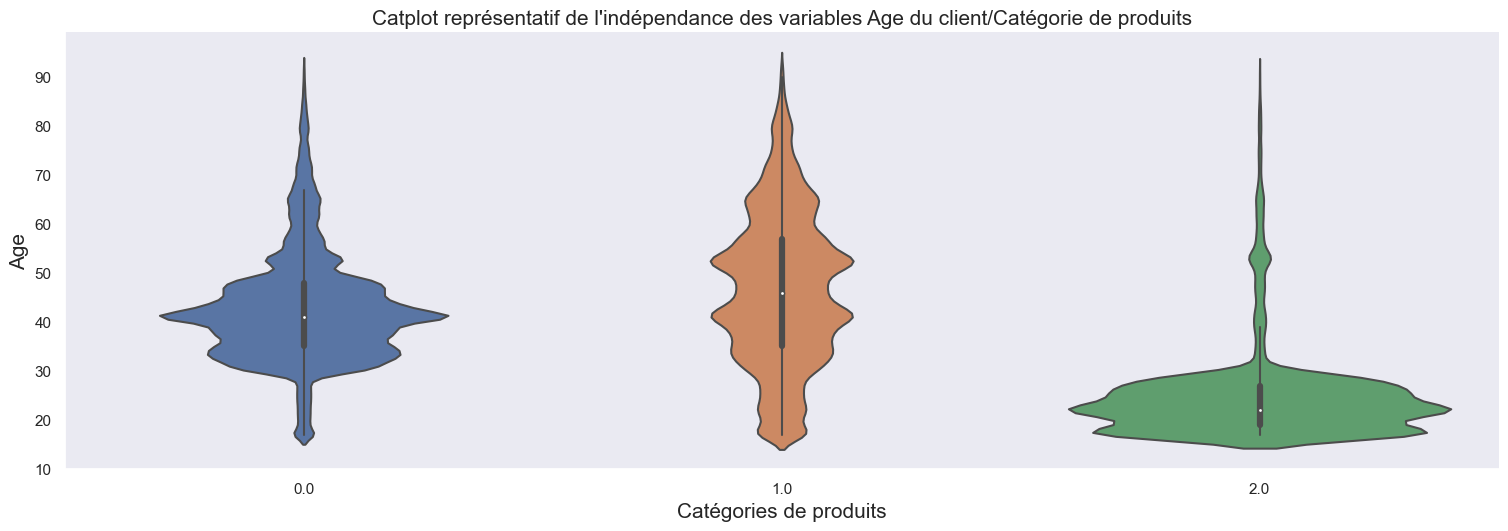

In [227]:
sns.catplot(x="categ", y="age", data=df_final, dodge=True, kind='violin', aspect=3)
plt.title("Catplot représentatif de l'indépendance des variables Age du client/Catégorie de produits",size=15)
plt.ylabel('Age', fontsize = 15)
plt.xlabel('Catégories de produits', fontsize = 15)
plt.show()

In [228]:
reg_simp = ols('age ~ categ', data=df_final).fit()
anova = sm.stats.anova_lm(reg_simp, typ=2)
anova

,sum_sq,df,F,PR(>F)
categ,5.919317e+05,1.0,3209.540411,0.0
Residual,6.357409e+07,344708.0,NaN,NaN


**Interprétation:**

**p<1% : cela signifie qu'en supposant que l'hypothèse nulle est vraie, il y a moins de 1% de chances de voir les données que nous avons par pure chance d'échantillonnage. En fixant notre niveau de signification, ou alpha, à 5% (et même à 1% dans le cas présent) ,puisque notre valeur p est inférieure à notre niveau de signification prédéterminé, nous pouvons rejeter l'hypothèse nulle et dire que la variable age d'un client et la variable catégorie de produits achetés sont corrélées.**

### Objectif 3 : Calculer la proba qu'un client achète la réference 0_525 sachant qu'il à acheté la réference 2_159

In [229]:
df_proba = df_final

**On créer la DataFrame qui renvoi le nombre d'achat pour ces 2 réferences par client :**

In [230]:
df_proba['0_525'] = df_proba['id_prod']=='0_525'
df_proba['2_159'] = df_proba['id_prod']=='2_159'

In [231]:
df_vente = df_final.groupby(['client_id']).agg({'0_525':'sum','2_159':'sum'})

In [232]:
df_vente.head()

,0_525,2_159
client_id,,
c_1,0,0
c_10,0,0
c_100,0,0
c_1000,0,0
c_1001,0,0


**On isole uniquement les clients ayant achetés la réference '2_159':**

In [233]:
df_vente = df_vente[df_vente['2_159']!=0]

**On isole les valeurs nulles pour pouvoir compter combien de clients ont achetés la réference 0_525 parmis cette population qui à acheté la réference 2_159:**

In [234]:
df_zero = df_vente[df_vente['0_525']!=0]

**On effectue le calcul de probabilité :**

In [235]:
print('Parmis les',len(df_vente),'clients qui ont acheté la réference 2_159, ',len(df_zero),'ont achetés la réference 0_525')
print('Il y a donc environ',round(len(df_zero)/len(df_vente)*100),"% de chance qu'un client achète la réference 0_525 sachant qu'il à acheté la réference 2_159")

Parmis les 295 clients qui ont acheté la réference 2_159,  249 ont achetés la réference 0_525
Il y a donc environ 84 % de chance qu'un client achète la réference 0_525 sachant qu'il à acheté la réference 2_159
